# **COMM475 -- Insured Asset Allocation (IAA)**

Instructor: Lorenzo Garlappi &copy; 2024<sup>*</sup>

TA: Tina Xi Tian

<sup>*</sup> <small>These notes are based on Rob Heinkel and Bill Tilford's lecture notes. I am grateful to them for generously sharing this material with me.</small>

## **Insured Asset Allocation (IAA)**


**1.   Why Do Asset Allocation Weights Change Under IAA**

**2.   Criteria for IAA Success**

**3.   Characterizing Stock Index Price Dynamics: The Binomial Tree**
<!-- *   Specifying the stochastic price process $=>$ probability distribution to ending index value -->

**4.   Five IAA Strategies**
*   Buy \& Hold
*   Stop-loss
*   Market-traded Puts and Calls
*   Synthetic options created by dynamic trading strategies
*   Constant Proportion Portfolio Insurance


## **1. Why Do Asset Allocation Weights Change under IAA?**

* Expectations (of returns and risks) do not change.
* Instead, investors' Relative Risk Tolerance ($RRT$) changes as their wealth changes

>> More investable wealth means risk tolerance increases $\rightarrow$ $RRT[W_{t}]$ increases.

>> Investors are more aggressive when their wealth increases.

>> Higher $W_{t}$ means bigger $RRT[W_{t}]$, implying larger $X_{st}$.

* The client’s objective in IAA:

>> The client wants upside potential and downside protection.

>> For example, a client might want, at his retirement date, a minimum account balance of $2 million (downside protection), but he wants more if the stock index does really well (upside potential).

>> A pension plan might have a specific annual cash requirement each year for the next 50 years. We can apply IAA to each annual cash requirement to provide at least that much, and more if the stock index does well.


* The desired payoff ($V_{T}$) as a function of the ending value of the stock index ($S_{T}$). The payoff occurs only on the final date $T$, shown in the graph:

The desired floor for our portfolio is $F_{T}$. If the index value on the payoff date, $S_{T}$, exceeds $F_{T}$, we want $S_T$. Otherwise, we want $F_{T}$, i.e.,
$$V_{T}=\text{max}(F_{T}, S_{T})$$

Upside potential: $\frac{Δ𝑉_{𝑇}}{Δ𝑆_{𝑇}}>0$ when $S_{T}>F_{T}$.

Downside Protection: $V_{T}=F_{T}$ when $S_{T}<F_{T}$.

The graph below plots the upside potential and downside protection for a payoff function.

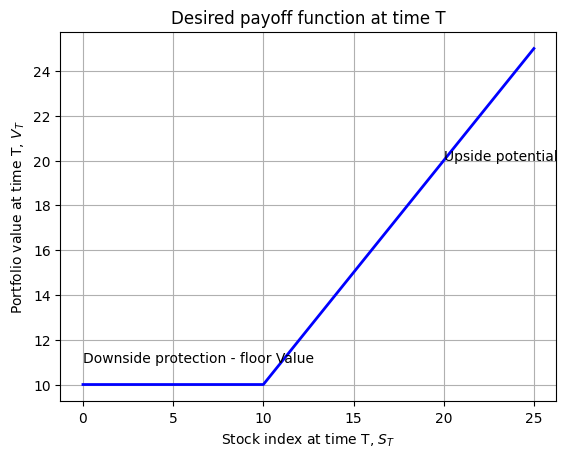

In [1]:
# Desired payoff function at future time T - upside potential and downside protection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

S_Ts = np.arange(0,30,5)
V_Ts = [10 for _ in range(6)]
ups = [0,0,0,5,10,15]

# add V_Ts and ups to get the desired payoff function at time T
V_T = [x + y for x, y in zip(V_Ts, ups)]

# plot the desired payoff function at time T
fig, ax = plt.subplots()
ax.plot(S_Ts, V_T, linewidth=2, color='blue')
ax.set_xlabel(r'Stock index at time T, $S_{T}$')
ax.set_ylabel(r'Portfolio value at time T, $V_{T}$')
ax.set_title('Desired payoff function at time T')
ax.text(20,20,'Upside potential')
ax.text(0,11,'Downside protection - floor Value')
ax.grid()
plt.show()

## **2. Criteria for IAA Success**

Most IAA strategies provide the insurance (i.e., downside protection) only at a specific date (e.g., 3 years from today). Call this date $T$. Define $𝐹_{𝑇}$ as the floor at date $T$, i.e., the minimum amount we want at that date. Also, define $𝑆_{𝑇}$ as the value of a stock index (e.g., the TSX Composite, or any well-diversified equity portfolio) at date $T$ and define $𝑉_{𝑇}$ as the value of our IAA portfolio at date $T$.

There are **three criteria** for any IAA strategy that provides insurance only at date $T$:

**IAA Criterion 1:** $𝑃rob(𝑉_{𝑇}<𝐹_{𝑇})=0$.

The portfolio value is never below the floor at the insurance date. This is *downside protection*.

**IAA Criterion 2:** When $𝑉_{𝑇}>𝐹_{𝑇}$, $d𝑉_{𝑇}/𝑑𝑆_{𝑇}=1$.

When the asset value is above the floor on date $T$, then a 1-dollar increase in $𝑆_{𝑇}$ will yield a 1-dollar increase in $𝑉_{𝑇}$. This is *full upside potential*.

**IAA Criterion 3:** Path independence.

The final portfolio value, $𝑉_{𝑇}$, depends only on the final stock index value, $𝑆_{𝑇}$. In particular, $𝑉_{𝑇}$ does NOT depend on the **path** the stock index took from the start to the end at $𝑆_{𝑇}$. This is **path independence**.

As an example of path independence, suppose $𝑆_{0}=100$. Then,

* Path #1: Between time $𝑡=0$ and $𝑡=1$, $𝑆_{𝑡}$ sinks down to $56$, then jumps up to $139$, finally ending up at $𝑆_{𝑇}=125$.
* Path #2: Between time $𝑡=0$ and $𝑡=1$, $𝑆_{𝑡}$ moves linearly and ends up at $𝑆_{𝑇}=125$.

If a strategy is **path independent**, then the strategy will have the same $𝑉_{𝑇}$, no matter Path #1 or Path #2 occurred. This is because both paths end up at the same $𝑆_{𝑇}=125$, and $𝑉_{𝑇}$ ONLY depends on the final $𝑆_𝑇$, not on how it got there.

## **3. Binomial Tree Characterization for Stock Index Price Movement**

The following is an example of the stock index price movement following a binomial tree model, where:

$𝑆_{0}=100$

$\text{UP} (u)=1.10$

$\text{Down} (d) =0.909$

$R_{𝑓}=1+ 5\%$


| t=0   | t=1   | t=2   | t=3   | t=4   | t=5   | t=6   | t=7   | t=8   |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|
|       |       |       |       |       |       |       |       |214.36 |
|       |       |       |       |       |       |       |194.87 |       |
|       |       |       |       |       |       |177.16 |       |177.16 |
|       |       |       |       |       |161.05 |       |161.05 |       |
|       |       |       |       |146.41 |       |146.41 |       |146.41 |
|       |       |       |133.10 |       |133.10 |       |133.10 |       |
|       |       |121.00 |       |121.00 |       |121.00 |       |121.00 |
|       |110.00 |       |110.00 |       |110.00 |       |110.00 |
| 100   |       |100    |       |100    |       |100    |       |100    |
|       |90.91  |       |90.91  |       |90.91  |       |90.91  |       |
|       |       |82.64  |       |82.64  |       |82.64  |       |82.64  |
|       |       |       |75.13  |       |75.13  |       |75.13  |       |
|       |       |       |       |68.30  |       |68.30  |       |68.30  |
|       |       |       |       |       |62.09  |       |62.09  |       |
|       |       |       |       |       |       |56.45  |       |56.45  |
|       |       |       |       |       |       |       |51.32  |       |
|       |       |       |       |       |       |       |       |46.65  |


Note the tree is “recombining”: $Up*Down = Down*Up$, where Up ($u$) is the multiple by which stock price $S$ increases if the index moves “up”; Down ($d$) is the multiple by which $S$ decreases if the index moves “down”.

$R_{f}$ is equal to one plus the riskless rate of return (assuming the same in each period, at each node).

Here we assume that $d=1/u$, but that is not necessary. $d=1/u$ puts the same number in each row of the tree. Also Risk-Neutral Probability is calculated as: $$ p=\frac{R_{f}-d}{u-d} = 0.738.$$

Now we simulate the binominal tree path for the stock index in python.

Firstly we import packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here we define a binomial tree model to simulate the stock price movement.

In [7]:
### A binomial tree for stock price ###
### Reference: https://github.com/VivekPa/BinomialOptModel

def binomial_model_stock(N, S0, u,d,r):
    """
    N = number of binomial iterations
    S0 = initial stock price
    u = factor change of upstate
    d = factor change of downstate
    r = risk free interest rate per annum
    """

    # calculate stock price tree at each node
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    return stock

In the following example, we use this function to calculate the stock price movement in a binomial tree model. With the given parameteris, the stock price at each node is calcualted as follows.

In [8]:
#### the binomial tree stock price movement when:
N = 8
S0 = 100
u = 1.1
d= 1 / u
r = 0.05

tree = binomial_model_stock(N,S0,u,d,r)
tree

array([[100.        , 110.        , 121.        , 133.1       ,
        146.41      , 161.051     , 177.1561    , 194.87171   ,
        214.358881  ],
       [  0.        ,  90.90909091, 100.        , 110.        ,
        121.        , 133.1       , 146.41      , 161.051     ,
        177.1561    ],
       [  0.        ,   0.        ,  82.6446281 ,  90.90909091,
        100.        , 110.        , 121.        , 133.1       ,
        146.41      ],
       [  0.        ,   0.        ,   0.        ,  75.13148009,
         82.6446281 ,  90.90909091, 100.        , 110.        ,
        121.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         68.30134554,  75.13148009,  82.6446281 ,  90.90909091,
        100.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  62.09213231,  68.30134554,  75.13148009,
         82.6446281 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

The above output is pretty ugly. To better visualize the binomial tree we can define a function to draw a prettier binomial tree.

In [9]:
# this function turn the stock price array into a binomial tree and draw the stock price movement path

def binomial_tree_plot(binomial_tree_values, dx=-0.025, dy=0.4, cex=1, digits=2,title='', **kwargs):
    """
    Plots the binomial tree of the Cox-Ross-Rubinstein binomial tree model.

    :param binomial_tree_values: The binomial tree values to be plotted.
    :param dx: Offset in x-direction for text.
    :param dy: Offset in y-direction for text.
    :param cex: Character expansion factor for text.
    :param digits: Number of digits to round the values to.
    :param title: Title of the plot.
    :param kwargs: Additional parameters to be passed to the plot function.
    """
    # Round the binomial tree values
    tree = np.round(binomial_tree_values, decimals=digits)
    depth = tree.shape[1]

    plt.plot([1, depth+1], [-depth + 1, depth], 'w')
    plt.scatter(1, 0, color='black')
    plt.text(1 + dx, 0 + dy, str(tree[0, 0]), fontsize=cex)

    for i in range(depth):
        y = np.arange(-i, i + 2, 2)
        x = np.full_like(y, i+1)
        plt.scatter(x, y, color='blue')

        for j in range(len(x)):
            plt.text(x[j] + dx, y[j] + dy, str(tree[len(x) - j -1, i]))

        y = np.arange(-i, i + 1)
        x = np.repeat([i, i-1], repeats=2 * i)[:len(y)]
        if len(y) >0 & len(x) >0:
            plt.plot(x, y, color='red')

    # Show the plot
    plt.xticks(np.arange(1, depth+1, 1))  
    plt.xlabel('Time Step')
    plt.ylabel('Node Value')
    plt.title(title)
    plt.show()


Now we can draw the binomial tree path with the defined function.

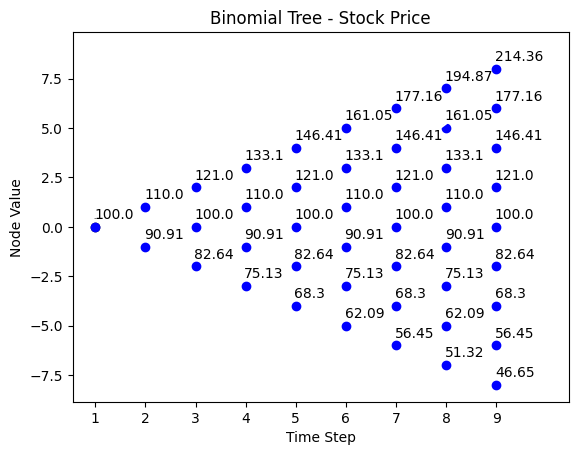

In [10]:
# binomial tree path for stock index

title = 'Binomial Tree - Stock Price'
binomial_tree_plot(tree, dx=-0.025, dy=0.4, cex=1, digits=2, title=title)

## **4. Future Stock Index Price Distributions**

This section we further consider the stock index price distributions.

Choosing $u$, $d$ and risk neutral propability $p= \text{Prob}(u)$ at any node, wec can have a distribution of the future stock index price. Here we consider two examples with a time horizon of $T=3$.

**Case #1: Symmetric Distribution**

When risk neutral probability is $0.5$, we call the distribution symmetric.

$S_{0} = 100$, $u = 1.10$, $d = 0.909$, $\text{Prob}(u) = 0.5$, $r_{f} = 5\%$.

| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 133.10|
|       |       | 121.00|       |
|       |110.00 |       |110.00 |
| 100   |       | 100   |       |
|       | 90.91 |       | 90.91 |
|       |       | 82.64 |       |
|       |       |       | 75.13 |



The probability of terminal node at $T=3$ is calculated as:


node | probability | path
-----| ------------| ----
$p(S_{3} = 133.10) = q^{3} = (0.5)^{3}$| $12.50\%$ | (u,u,u)
$p(S_{3} = 110.00) = 3q^{2}(1-q) = 3(0.5)^{2}(1-0.5)$| $37.5\%$|(u,u,d) or (u,d,u) or (d,u,u)
$p(S_{3} = 90.91) = 3q(1-q)^{2} = 3(0.5)(1-0.5)^{2}$| $37.5\%$|(u,d,d) or (d,u,d) or (d,d,u)
$p(S_{3} = 75.15) = 3(1-q)^{3} = 3(1-0.5)^{3}$| $12.5\%$|(d,d,d)

Let's simulate the path with the binomial tree model we defined in last section.

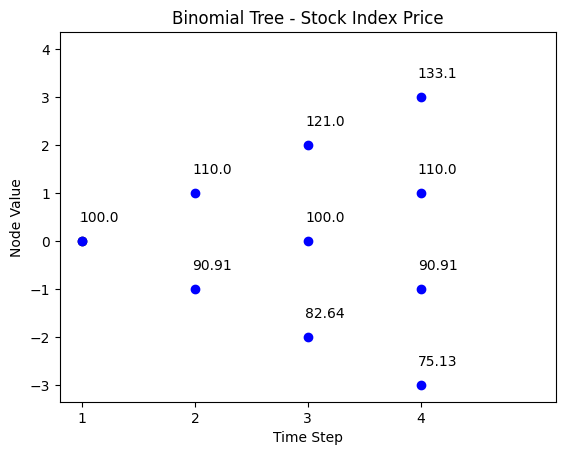

In [12]:
# Binomial tree path for stock price
N = 3
S0 = 100
u = 1.1
d = 1/u
r = 0.05

title = 'Binomial Tree - Stock Index Price'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r), dx=-0.025, dy=0.4, cex=1, digits=2,title =title)

We plot the probability distribution of stock index price at time $T$.

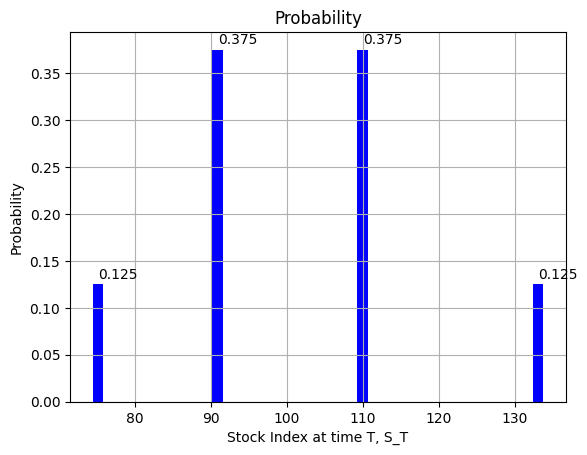

In [13]:
# Probability distribution of stock index at time T (Symmetric)
# binomial tree stock price
N = 3
S0 = 100
u = 1.1
d = 1/u
r = 0.05

tree = binomial_model_stock(N,S0,u,d,r)


S_Ts = [tree[0,3],tree[1,3],tree[2,3],tree[3,3]]

# calculate the probability of final node of binomial tree
p = 0.5
q = 1 - p

# combination function in python
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

probs = [nCr(3,i)*p**i*q**(3-i) for i in range(4)]

# draw the probability distribution of stock index at time T
fig, ax = plt.subplots()

bar_width = 1.4  # Adjust this value as needed
ax.bar(S_Ts, probs, color='blue',width=bar_width )
ax.set_xlabel('Stock Index at time T, S_T')
ax.set_ylabel('Probability')
ax.set_title('Probability')
ax.grid()
for i in range(4):
    ax.text(S_Ts[i],probs[i]+0.006,f'{probs[i]:.3f}')
plt.show()


**Case #2: Asymmetric Distribution (lognormal) with mean ($\mu$) $=10%$ and volatility ($\sigma$) $=20%$**

We consider asymmetric distribution, where the upward and downward probabilities are not equal.


$\mu = 10\%$, $\sigma = 20%$, $S_{0} = 100$, $u = 1.1224$, $d = 0.8909$, $r_{f} = 10\%$.

$\text{Probability}(p) = 64.43\%$

$u = e^{\sigma*\frac{1}{T^{1/2}}}$

$d = \frac{1}{u}$

$p = 0.5 + 0.5*\frac{\mu}{\sigma}*(\frac{1}{T})^{1/2}$

The stock index price path is:


| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 141.40|
|       |       | 125.98|       |
|       |112.24 |       | 112.24|
| 100   |       | 100   |       |
|       | 89.09 |       | 89.09 |
|       |       | 79.38 |       |
|       |       |       | 70.72 |


The probabilities of terminal nodes are calculated as below. We see that the probability of $p(S_{3} = 112.24)$ and $p(S_{3} = 89.09)$ are different.


node | probability | path
-----| ------------| ----
$p(S_{3} = 141.40) = q^{3} = (0.6443)^{3}$|26.75% | (u,u,u)
$p(S_{3} = 112.24) = 3q^{2}(1-q) = 3(0.6443)^{2}(1-0.6443)$| 44.3%|(u,u,d) or (u,d,u) or (d,u,u)
$p(S_{3} = 89.09) = 3q(1-q)^{2} = 3(0.6443)(1-0.6443)^{2}$| 24.46%|(u,d,d) or (d,u,d) or (d,d,u)
$p(S_{3} = 70.72) = 3(1-q)^{3} = 3(1-0.6443)^{3}$| 4.5%|(d,d,d)

Let's simulate the stock index price path using the binomial tree functions defined.

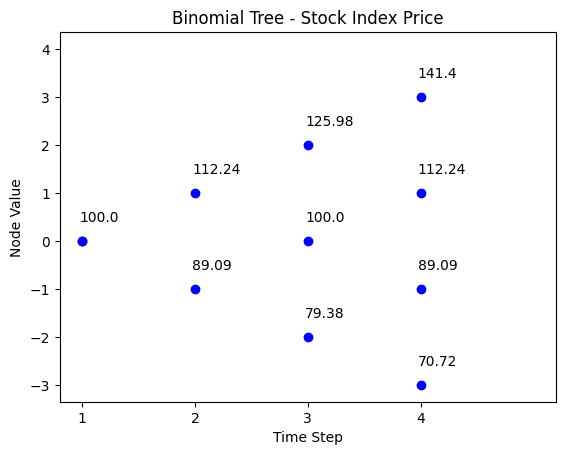

In [14]:
# Binomial tree path for stock price
N = 3
S0 = 100
u = 1.1224
d =1/u
r = 0.1

title = 'Binomial Tree - Stock Index Price'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r), dx=-0.025, dy=0.4, cex=1, digits=2,title =title)

We plot the probability distribution of stock index price at time $T$ when the probability is asymmetric.

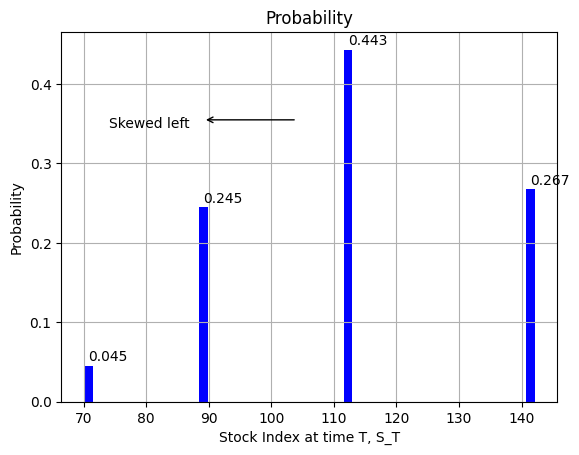

In [15]:
# Probability distribution of stock index at time T (skewed)
# binomial tree stock price
N = 3
S0 = 100
u = 1.1224
d = 1/u
r = 0.05

tree = binomial_model_stock(N,S0,u,d,r)


S_Ts = [tree[0,3],tree[1,3],tree[2,3],tree[3,3]]

# calculate the probability of final node of binomial tree
p = 0.6443
q = 1 - p

# combination function in python
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

probs = [nCr(3,i)*p**(3-i)*q**(i) for i in range(4)]

# draw the probability distribution of stock index at time T
fig, ax = plt.subplots()

bar_width = 1.4  # Adjust this value as needed
ax.bar(S_Ts, probs, color='blue',width=bar_width)
ax.set_xlabel('Stock Index at time T, S_T')
ax.set_ylabel('Probability')
ax.set_title('Probability')
ax.grid()
for i in range(4):
    ax.text(S_Ts[i],probs[i]+0.006,f'{probs[i]:.3f}')

ax.text(S_Ts[2]-15,probs[2]+0.1,'Skewed left')

# Add an arrow annotation
arrow_start = (S_Ts[2],probs[2]+0.11)  # Starting point of the arrow
arrow_end = (S_Ts[2]+15,probs[2]+0.11)    # Ending point of the arrow
arrow_properties = dict(arrowstyle='->', color='black')  # Arrow style and color

plt.annotate('',xy=arrow_start,xytext=arrow_end, arrowprops=arrow_properties)
plt.show()

## **5. IAA Strategies**

In this section, we explain the following five IAA strategies:
*   Buy \& Hold
*   Stop-loss
*   Market-traded Puts and Calls
*   Synthetic options created by dynamic trading strategies
*   Constant Proportion Portfolio Insurance

## **5.1 Buy and Hold**

This is a (static, linear) strategy.

This strategy is to buy enough T-Bills today ($t=0$) to grow to the required floor ($F_{T}$ at $T$), and to put the remainder of investable funds, $V_{0}$, in the stock index. Thus, the strategy will achieve the floor even if the index ends at $S_{T}=0$.

**An Example:**

The current price of the stock is $S_{0} = 100$, time period is $T=1$, the required floor of asset value at $T=1$ is $F_{T} = 200$.
The total amount of investable funds at $T=0$ is, $V_{0} = 200$, risk free rate is $r_{f} = 5\%$.

At $T = 0$：

* Buy $\frac{F_{T}}{(1+r_{f})^{T}} = \frac{200}{1.05} = \text{190.48}$ in T-Bills

* Buy $V_{0} - \frac{F_{T}}{(1+r_{f})^{T}} = 200 - 190.48 = 9.52$ in the stock index


Does the Buy \& Hold Strategy meet the three IAA Criteria?

1.   Probability $(V_{T}<F_{T})=0$? YES
2.   Upside potential: $dV_{T}/dS_{T}=1$? NO, because only a small portion of the investor's initial investable funds is invested in the stock index.
3.   Path independent? YES

So, the major problem with the Buy \& Hold Strategy is its lack of upside potential. The amount of money that is dedicated to satisfying the floor requirements leaves little to invest in the stock index to give upside potential.

The following is a simple function to calculate the amount of value to be invested in T-Bills to achieve the floor of the asset value at time $t$. The time to maturity is $T-t$.

In [16]:
### This is a function to calculate the amount of value to be invested in T-Bills to achieve the asset floor value FT at period T ###
### function input
# FT: final payoff at time T
# rf: risk free rate
# t: current time period
# T: number of time periods

def floor(FT,rf,t,T):
  return FT/(1+rf)**(T-t)

print("The amount invested in T-Bills to achieve the floor value FT at Time T is:", np.round(floor(200,0.05,0,1),3))

The amount invested in T-Bills to achieve the floor value FT at Time T is: 190.476


Now we plot the payoff function for buy and hold strategy.

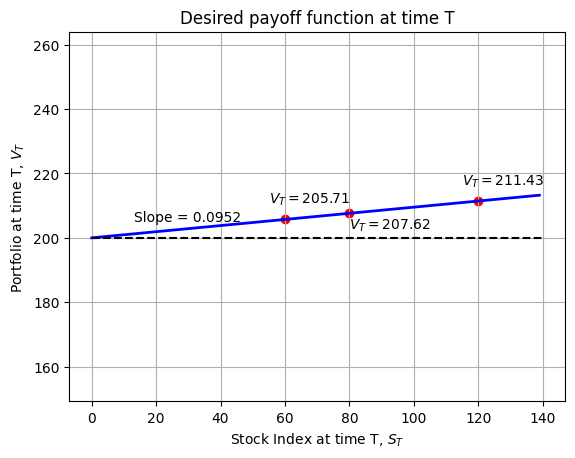

In [36]:
# payoff function for buy and hold strategy
# Plot the following function:
S_0 = 100
V_0 = 200
F_T = 200
r_f = 0.05

dollar_index = V_0 - F_T/(1+r_f)
n_index = dollar_index/S_0

S_T = np.arange(0, 140, 1)
V_T = F_T + n_index * S_T
plt.plot(S_T, V_T, linewidth=2, color = 'blue')
plt.xlabel(r'Stock Index at time T, $S_{T}$')
plt.ylabel(r'Portfolio at time T, $V_{T}$')

# put t title that says "Desired payoff furnction at time T" and put a label that says Slope = 0.0952
plt.title('Desired payoff function at time T')
plt.text(13, F_T+5, 'Slope = 0.0952')

S_T1 = 60
S_T2 = 80
S_T3 = 120

V_T1 = F_T + n_index * S_T1
V_T2 = F_T + n_index * S_T2
V_T3 = F_T + n_index * S_T3

plt.scatter([S_T1, S_T2, S_T3], [F_T + n_index * S_T1, F_T + n_index * S_T2, F_T + n_index * S_T3], color='red')
plt.plot([0, 140], [200, 200], 'k--')

plt.text(S_T1-5, V_T1+5, f'$V_T={V_T1:.2f}$')
plt.text(S_T2, V_T2-5, f'$V_T={V_T2:.2f}$')
plt.text(S_T3-5, V_T3+5, f'$V_T={V_T3:.2f}$')
plt.axis('equal')
plt.grid()
plt.show()


## **5.2 Stop-Loss**

This is a (dynamic, convex) strategy.

This strategy does the following:

* Start the period invested all in stock, $𝑋_{𝑠,0}=1$.
* Stay in stock until the end of the period unless $𝑉_{𝑡}$ reaches the floor:
$$𝑃V_{𝑡}(𝐹_{T})=\frac{𝐹_{𝑇}}{(1+𝑟_{𝑓})^{𝑇-𝑡}}$$

If this happens, sell all the stock and buy T-Bills, $𝑋_{𝑠,𝑡}=0$ . Then stay in T-Bills until the end of the period.
The function $𝑃V_{𝑡}(𝐹_{𝑇})$ defined above is the dollars of T-Bills you would have to buy at
date $𝑡$, 𝑓or $0<𝑡<𝑇$, to just have the T-Bills grow to $𝐹_{𝑇}$ on date $T$, insuring your portfolio will stay above the floor at date $T$. So, this strategy is barely dynamic:

* At $𝑡=0$, all of $𝑉_{0}$ is put in the stock index, $𝑋_{𝑠,0}=1$.
* If $𝑉_{𝑡}$ stays above $𝑃V_{𝑡}(𝐹_{𝑇})$ for all $t$ up to $T$, then no trading is done and the portfolio ends up in all stock,
i.e., $𝑋_{𝑠,𝑇}=1$.
* If and when $𝑉_{𝑡}$ hits $𝑃V_{𝑡}(𝐹_{𝑇})$, the stock index investment is sold and the proceeds are put into T-Bills, $𝑋_{𝑠,𝑡}=0$, and this is just enough T-Bills to mature at $𝑉_{𝑇}=𝑆_{𝑇}$ on $𝑡=𝑇$. After buying T-Bills, there’s no more trading.

**Does the Stop-Loss strategy satisfy our three criteria?**
1.   Downside protection: $𝑃rob(𝑉_{𝑇}<𝐹_{𝑇})=0$? YES - but, only if there are no *jumps* in the stock index.
2.   Upside potential: If $𝑉_{𝑇}>𝐹_{𝑇}$ then $dV_{T}/dS_{T} = 1$? YES, but ONLY if there is no switch to T-Bills.
3.   Path independence? NO. This is path dependent.

**Path Dependence of the Stop-Loss Strategy**

The stop-loss strategy’s payoff depends upon HOW the stock index gets to its final value, not just on its final value. This is **path DEPENDENCE**. We now explain it with a binomial tree model.

Assume a binomial tree and the starting wealth is:
* $S_{0} = 100$, $V_{0} = 200$, $F_{3} = 170.10$

* $u = 1.20$, $d = 0.90$, $r_{f} = 5\%$

The path for stock index $S_{t}$ is

| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 172.80|
|       |       | 144.00|       |
|       |120.00 |       | 129.60|
| 100   |       | 108   |       |
|       | 90.00 |       | 97.20 |
|       |       | 81.00 |       |
|       |       |       | 72.90 |


Under unconstrainced investment, the path for the portfolio value $V_{t}$ is shown in the following. Here the investor buys two shares of stock index, i.e. the initial value $V_{0}$ is $200$.

| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 345.60|
|       |       | 288.00|       |
|       |240.00 |       | 259.20|
| 200   |       | 216.00|       |
|       | 180.00|       | 194.40|
|       |       | 162.00|       |
|       |       |       | 145.80|


With stop-loss investment strategy, the path for the portfolio value $V_{t}$ is shown below. The investor switches to T-Bills at $t=2$ when the portfolio value hits the floor $162 (170.1/(1 + 0.05))$ where $0.05$ is the risk free rate, and $162$ is the one-period discount value of the floor value $170.1$.

| t = 0     | t = 1     | t = 2   | t = 3     |
|-----------|-----------|---------|-----------|
|           |           |         | 345.60    |
|           |           | 288.00  |           |
|           | 240.00    |         | 259.20    |
| 200       |           | 216.00  |           |
|           | 180.00    |         | 194.40    |
|           |           | 162.00  | **170.10**|
|           |           |         | **170.10**|
| **146.94**| **154.29**| **162.00**| $$170.10 = PV_{t}(F_{T})$$|


We inserted the $PV_{t}(F_{T})$ under the binomial tree. Whenever the portfolio value hits the floor $PV_{t}(F_{T})$, the stop-loss investment strategy switch stock index to T-Bills. And in the rest of time periods, the portfolio grows with risk free rate.

The strategy starts out fully invested (all $V_{0} = 200$) in the stock index. If $S_{2} = 81$, i.e. if the portfolio value $V_{2} = 162$, we hit the "floor" $[PV_{t}(F_{T})]$ at which time we sell our stock and buy ```$162``` worth of T-Bills. This has one period to grow, so it grows to $162 * (1.05) = 170.10$, whether the stock index goes up or down at period $t=3$.

To show path dependence, note the following:

Suppose the stock index finishes at $S_{3}=97.2$. What is our portfolio $V_{3}$? We can’t say unless we know the PATH the index took to end up at $S_{3}=97.2$:
* If the index went ($u$,$d$,$d$) or ($d$,$u$,$d$), then the floor is not hit and $V_{3}=194.40$
* If the index went ($d$,$d$,$u$), then we hit the floor and $V_{3}=170.10$
  
Since $V_{3}$ depends upon the index’s path to $S_{3}$, the strategy is **path DEPENDENT**.

We firstly plot the path dependence of stop-loss strategy.

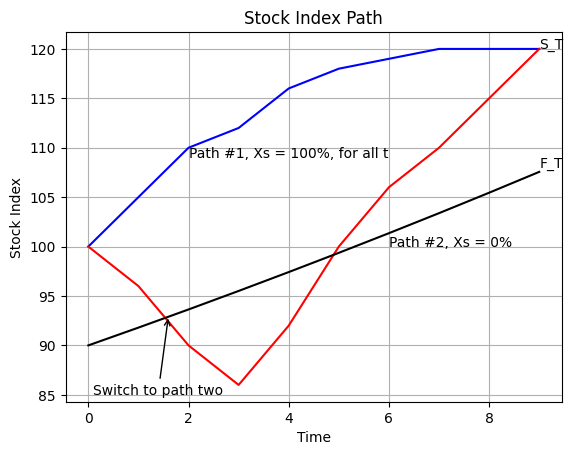

In [44]:
### Stop-loss strategy - path dependent

Ts = np.arange(0,10,1)
Sts01 = [100,105,110,112,116,118,119,120,120,120]
Sts02 = [100,96,90,86,92,100,106,110,115,120]

# generate a list of numbers increase at a constant rate
def increase(a,r,N):
    result = []
    for i in range(N):
        result.append(a*(1+r)**i)
    return result

FTs = increase(90,0.02,10)

# draw the graph for stock value of different paths
fig, ax = plt.subplots()
ax.plot(Ts, Sts01, label='Path 1', color = 'blue')
ax.plot(Ts, Sts02, label='Path 2', color = 'red')
ax.plot(Ts, FTs, label='Floor Value', color = 'black')
ax.set_xlabel('Time')
ax.set_ylabel('Stock Index')
ax.set_title('Stock Index Path')
# ax.legend()
ax.grid()
ax.text(2,109,'Path #1, Xs = 100%, for all t')
ax.text(6,100,'Path #2, Xs = 0%')
ax.text(9,120,'S_T')
ax.text(9,108,'F_T')

# Add an arrow annotation
arrow_start = (1.6,93)  # Starting point of the arrow
arrow_end = (0.1, 85)    # Ending point of the arrow
arrow_properties = dict(arrowstyle='->', color='black')  # Arrow style and color

plt.annotate('Switch to path two',xy=arrow_start,xytext=arrow_end, arrowprops=arrow_properties)
plt.show()

Next we simulate the stock index price under unconstrined investment in the following code.

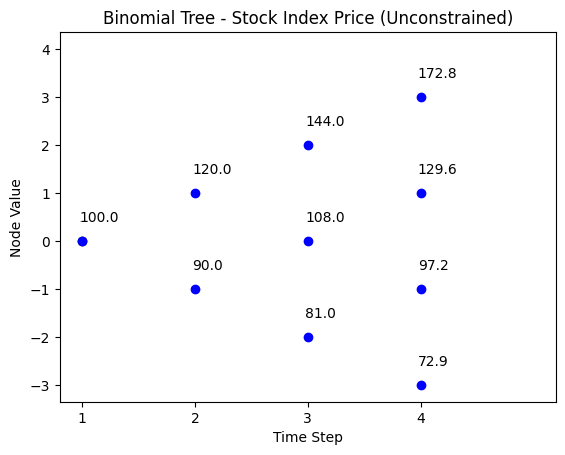

In [14]:
# path for sock binomial tree
N = 3
S0 = 100
u = 1.2
d =0.9
r = 0.05

title = 'Binomial Tree - Stock Index Price (Unconstrained)'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r), dx=-0.025, dy=0.4, cex=1, digits=2,title = title)


To simulate the portfolio / stock index price path under stop-loss strategy, we firstly define a function to calculate the stock pric at each node under stop-loss investment strategy.

In [70]:
# This function generates the asset path for Stop-loss strategy.
# We only need replace with the minimum cashflow if the cashflow fall below the stop-loss point.

def binomial_model_stock_SL(N, S0, u,d,r,SL):
    """
    N = number of binomial iterations
    S0 = initial stock price
    u = factor change of upstate
    r = risk free interest rate per annum
    SL = final floor value FT at time T
    """
    # d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p

    # make stock price tree
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # replace stock price with SL if the stock price falls below the SL:
    # this part of the code is to identify the node where stop loss strategy is activated.
    # the code identify the column (i) where the stop loss strategy starts and the node value (stock[j,i]) where the stop loss strategy is activated
    flag = False
    for i in range(N):
        for j in range(i+1):
            # print(j,i,stock[j,i])
            if stock[j,i] <= SL/(1+r)**(N-i):
                stop_loss_col = i
                stop_loss_node = stock[j,i]
                flag = True
                break
        if flag:
            break

    # this part of the code is to replace the stock price with the minimum cashflow if the cashflow falls below the stop-loss point.
    for i in range(stop_loss_col,N):
        for j in range(stop_loss_col,i+2):
            stock[j,i+1] = stop_loss_node*(1+r)**(i-stop_loss_col+1)
            # print(j,i+1,stock[j,i+1],i-stop_loss_col+1,stop_loss_node)

    return stock

Now let's simulate the stock price path for stop-loss strategy.

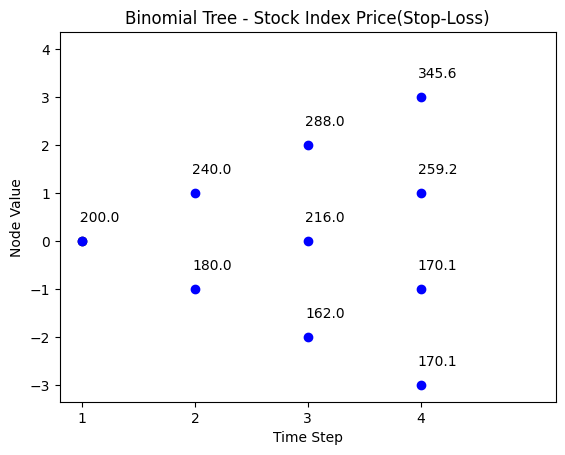

In [16]:
# The binomial tree plot when there is stop loss and path switch

N = 3
S0 = 200
u = 1.2
d = 0.9
r = 0.05
SL = 170.10

title = 'Binomial Tree - Stock Index Price(Stop-Loss)'


binomial_tree_plot(binomial_model_stock_SL(N,S0, u, d,r, SL), dx=-0.025, dy=0.4, cex=1, digits=2,title = title)

The strategy shows that the asset value stays at $170.1$ once it touches the stop-loss value.

**The Stop-Loss Strategy and Stock Index Price Jumps**

Any dynamic strategy, i.e., one that involves trading the stock index and T-Bills, is subject to problems if the index can “jump” (not change smoothly). It certainly jumps in the binomial model (from $t=1$, $S_{1}=120$, it “jumps” to either $S_{2}=144$ or $S_{2}=108$). In this case, the portfolio value, $V_{t}$ might jump right through the floor. We show this in the following example.


Assume a binomial tree and the starting wealth:
* $S_{0} = 100$, $V_{0} = 200$, $F_{3} = 198.45$

* $u = 1.20$, $d = 0.90$, $r_{f} = 5\%$

The path for stock index $S_{t}$ is:

| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 172.80|
|       |       | 144.00|       |
|       |120.00 |       | 129.60|
| 100   |       | 108   |       |
|       | 90.00 |       | 97.20 |
|       |       | 81.00 |       |
|       |       |       | 72.90 |


Under unconstrained investment, the path for the (all stock) portfolio value $V_{t}$ is shown below.

| t = 0 | t = 1 | t = 2 | t = 3 |
|-------|-------|-------|-------|
|       |       |       | 345.60|
|       |       | 288.00|       |
|       |240.00 |       | 259.20|
| 200   |       | 216.00|       |
|       | 180.00|       | 194.40|
|       |       | 162.00|       |
|       |       |       | 145.80|



With stop-loss investment strategy, the path for the portfolio value $V_{t}$ is shown below.

| t = 0   | t = 1   | t = 2   | t = 3   |
|---------|---------|---------|---------|
|         |         |         | 345.60  |
|         |         | 288.00  |         |
|         |240.00   |         | 259.20  |
| 200.00  |         | 216.00  |         |
|         | 180.00  |         | 194.40  |
|         |         | 162.00  | 198.45  |
|         |         |         | 198.45  |
| 171.43  | 180.00  | 189.00  | **$198.45 = PV_{t}(F_{T})$** |


If the stock index goes to state $d$ at $t=1$, we hit the $PV$ of the floor and switch to T-Bills, giving us exactly the floor at $t=3$.

But suppose the index goes ($u$,$d$), going to $S_{2}=108$. Our portfolio value is still above the $PV$ of the floor, so we do not switch (sell the index and buy T-Bills). However, if the index then goes ($u$,$d$,$d$), we hit $S_{3}=97.2$ or , since we stayed in the stock index, $V_{3}=194.40$ ,and this is below the floor.
The stock index “jumped” through the floor. We could have, as a precaution, switched at $V_{2}=216$ (when $S_{2}=108$), but we sacrifice lots of upside potential by doing that.


The following code simulates the stock index price path under stop-loss strategy. Stop-loss strategy is activated at $t=1$, when $V_{t} = 180.00$.

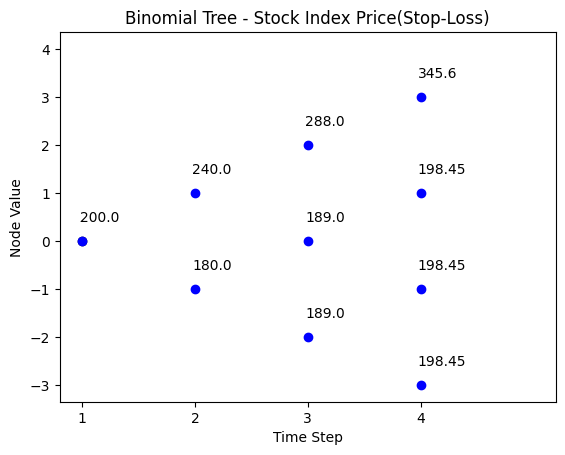

In [17]:
# The binomial tree plot when there is stop loss and path switch

N = 3
S0 = 200
u = 1.2
d = 0.9
r = 0.05
SL = 198.46 # because of rounding issue, I have to use a value that is slightly higher than the stop loss value

title = 'Binomial Tree - Stock Index Price(Stop-Loss)'


binomial_tree_plot(binomial_model_stock_SL(N, S0, u,d, r, SL), dx=-0.025, dy=0.4, cex=1, digits=2,title=title)

## **5.3 Portfolio Insurance with Traded Stock Index**

We explain the strategy of portfolio insurance with call options and put options in this section. This section is divided into two parts: 5.3.1 discusses the portfolio insurance strategy with call options, and 5.3.2 discusses the portfolio insurance strategy with put options.

### **5.3.1  Call Options**

This is a (static, convex) strategy.

If call options on the stock index exist with maturities equal to the date on which you wish to be insured, and with the right exercise price, then this is a simple way to achieve the desired insurance.
We illustrate this with the following example.

Suppose:

Current index $S_{0}$ = 100, desired floor $F_{T} = 100$, $T = 91$ day, $r_{f} = 10\%$, $\sigma = 20\%$.

Note:

If annual $r_{f} = 10\%$, Black scholes price of a $91-day$, $K=100$ call option is ```$5.22```.

We consider the following synthetic strategy:

* Buy T-Bills: $\frac{K}{(1+r_{f})^{1/4}} = 100*0.9765 = 97.65$.

* Buy a call option: ```$5.22```

Total cost: ```$102.87```

With different stock index price $S_{T}$, the ending value of the synthetic portfolio is:

$S_{T}$ | T-Bills | $$K=100 \text{ call}$$| Total value
--------|--------|------------|------------
90      |100     | 0          |100
95      |100     | 0          |100
100     |100     | 0          |100
105     |100     | 5          |105
110     |100     | 10         |110
115     |100     | 15         |115

*Note the initial investment required is greater than the current value of the stock index. Why this is will be obivous from the explanation in section 5.4. *

This IAA payoff is equivalent to buying T-Bills with a face value of $F_{T}$(a flat line at $F_{T}$) and buying a call option on the stock index with a strike price $K=F_{T}$.





The call and put option price can be calculated with the following Black-Scholes pricing formulas. Black-Scholes pricing formulas use continuously compounded interest rate for discounting, so we need transform annual interest rate to coutinuously compounded interest rate and then apply Black-Scholes formulas.

In [18]:
# Black-Scholes formula for call and put options

import numpy as np
from scipy.stats import norm

N = norm.cdf

### this function transform annual interest rate to continuously compounded interest rate
# annual_rf: annual interest rate
def annual_comp_r(annual_rf):
    return np.log(1 + annual_rf)

### the following two functions calculate the european call and put option price using the black scholes formula
# S: current stock price
# K: strike price of the option
# T: time to maturity (in year)
# div: dividend yield
# r: risk free interest rate (compounded annually)
# sigma: volatility of underlying asset

# European call option price
def BS_CALL(S, K, T, r, sigma,div=0):
    d1 = (np.log(S / K) + (r - div + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-div*T)* N(d1) - K * np.exp(-r*T)* N(d2)

# European put option price
def BS_PUT(S, K, T, r, sigma,div=0):
    d1 = (np.log(S / K) + (r - div + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S* np.exp(-div*T) *N(-d1)


S = 100
K = 100
sigma = 0.2
annual_rf = 0.1
div = 0 #dividend_yield
T_days = 91
T = T_days / 365  # Converting days to years

print("Black-Scholes Price for the call option:", np.round(BS_CALL(S,K,T,annual_comp_r(annual_rf),sigma,div),3))
print("Black-Scholes Price for the put option:", np.round(BS_PUT(S,K,T,annual_comp_r(annual_rf),sigma,div),3))


Black-Scholes Price for the call option: 5.22
Black-Scholes Price for the put option: 2.872


Now we plot the payoff function at time $T$ for the portfolio insurance strategy with call options.

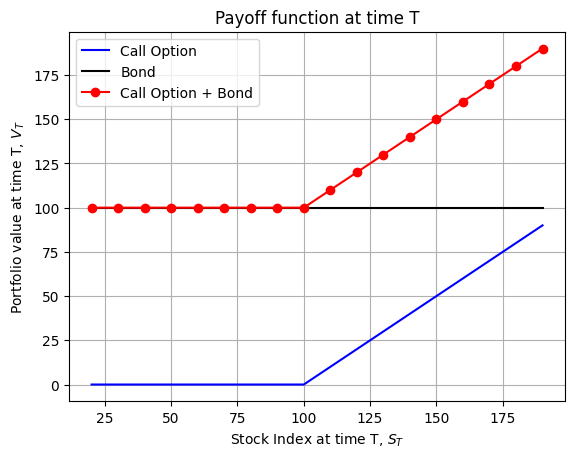

In [30]:
# generate the opayoff of a call option for stock prices from 25 to 200 with a strike price of 100 plus a bond with payoff 100
F_T = 100
S_Ts = np.arange(20,200,10)
call_payoff = [np.max([S_t - F_T,0]) for S_t in S_Ts]
bond_payoff = [F_T for _ in range(len(S_Ts))]
call_bond_payoff = [call + bond for call,bond in zip(call_payoff,bond_payoff)]
# plot the payoff of the call option, the bond and the call option plus bond
fig, ax = plt.subplots()
ax.plot(S_Ts, call_payoff, label='Call Option', color = 'blue')
ax.plot(S_Ts, bond_payoff, label='Bond', color = 'black')
ax.plot(S_Ts, call_bond_payoff, label='Call Option + Bond', color = 'red', marker='o')
ax.set_xlabel('Stock Index at time T, $S_{T}$')
ax.set_ylabel('Portfolio value at time T, $V_{T}$')
ax.set_title('Payoff function at time T')
ax.legend()
ax.grid()
plt.show()


### **5.3.2 Put Options**

Section 5.3.1 explains the portfolio insurance strategy with call options, this part replicates the discussion with put options.

This is a (static, convex) strategy.

Considering the following example.

Suppose:

Current index $S_{0}$ = 100, desired floor $F_{T} = 100$, $T = 91$ day, $r_{f} = 10\%$, $\sigma = 20\%$

Note:

If annual $r_{f} = 10\%$, Black scholes price of a $91$-day, $K=100$ put option is ```$2.87```.

Strategy:

* Buy the stock index: $100.00$

* Buy a put option: ```$2.87```

Total cost: ```$102.87```

The ending value of the portfolio with put options varies with the stock price at time $T$:

$S_{T}$ | $$K=100 \text{ put}$$| Total value
--------|------------|------------
90      | 10         |100
95      | 5          |100
100     | 0          |100
105     | 0          |105
110     | 0          |110
115     | 0          |115

By put-call parity, the cost of this strategy is the same as the cost of the “call + T-Bills” strategy shown previously. Here, you buy the index ($cost=100$) and you pay an insurance premium (```$2.87```), so investment exceeds the cost of the stock index.

We plot the payoff function at time $T$ for the strategy with put options.

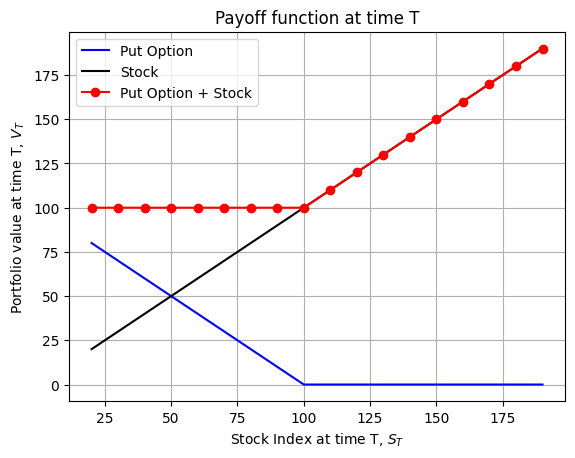

In [31]:
# generate the opayoff of a put option for stock prices from 25 to 200 with a strike price of 100 plus a long position in the stock index
F_T = 100
S_Ts = np.arange(20,200,10)
put_payoff = [np.max([F_T - S_t,0]) for S_t in S_Ts]
stock_payoff = S_Ts
put_stock_payoff = [put + stock for put,stock in zip(put_payoff,stock_payoff)]
# plot the payoff of the put option, the stock and the put option plus stock
fig, ax = plt.subplots()
ax.plot(S_Ts, put_payoff, label='Put Option', color = 'blue')
ax.plot(S_Ts, stock_payoff, label='Stock', color = 'black')
ax.plot(S_Ts, put_stock_payoff, label='Put Option + Stock', color = 'red', marker='o')
ax.set_xlabel('Stock Index at time T, $S_{T}$')
ax.set_ylabel('Portfolio value at time T, $V_{T}$')
ax.set_title('Payoff function at time T')
ax.legend()
ax.grid()
plt.show()


We combine the traded strategy with put options and call options and plot the payoff function in future time $T$.
The strategies with put options and call options give us the same payoff functions because of put-call parity.

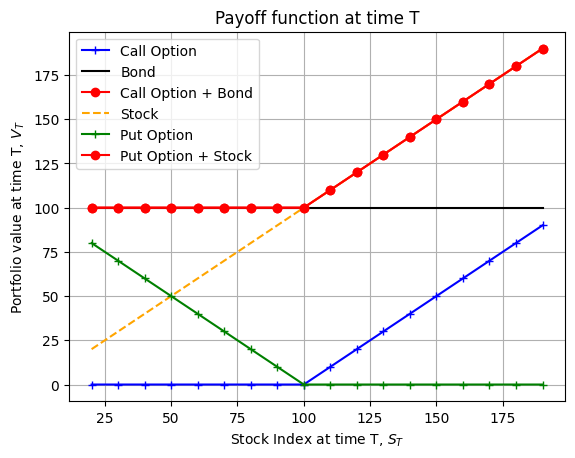

In [37]:
# Draw on the same graph the payoff of a long call + bond and long stock plus put. put the payoff of calls and puts in dashed and different colors
F_T = 100
S_Ts = np.arange(20,200,10)
call_payoff = [np.max([S_t - F_T,0]) for S_t in S_Ts]
bond_payoff = [F_T for _ in range(len(S_Ts))]
call_bond_payoff = [call + bond for call,bond in zip(call_payoff,bond_payoff)]
put_payoff = [np.max([F_T - S_t,0]) for S_t in S_Ts]
stock_payoff = S_Ts
put_stock_payoff = [put + stock for put,stock in zip(put_payoff,stock_payoff)]
# plot the payoff of the call option, the bond and the call option plus bond
fig, ax = plt.subplots()
ax.plot(S_Ts, call_payoff, label='Call Option', color = 'blue', marker='+')
ax.plot(S_Ts, bond_payoff, label='Bond', color = 'black')
ax.plot(S_Ts, call_bond_payoff, label='Call Option + Bond', color = 'red', marker='o')
ax.plot(S_Ts, stock_payoff, label='Stock', color = 'orange', linestyle='dashed')
ax.plot(S_Ts, put_payoff, label='Put Option', color = 'green', marker='+')
ax.plot(S_Ts, put_stock_payoff, label='Put Option + Stock', color = 'red', marker='o')
ax.set_xlabel('Stock Index at time T, $S_{T}$')
ax.set_ylabel('Portfolio value at time T, $V_{T}$')
ax.set_title('Payoff function at time T')
ax.legend()
ax.grid()
plt.show()


## **5.4 Synthetic Options**

### **5.4.1 An Example of Synthetic Insurance Strategy**

One problem with using traded puts and calls to create IAA payoffs is that the strike prices and maturities one needs may not be available. When the maturities do not meets the demand, we can create SYNTHETIC options to replicate a IAA payoff.

Consider the following example:

* $S_{0} = 100$, $F_{T} = 100$
* $u=1.10$, $d = 0.91$, $r_{f} = 4\%$

We define:

*   $\text{Delta}_{t}$: the number of shares of the stock index to hold at a given node, and at date $t$.

*   $B_{t}$: dollar investments of T-Bills to hold at a given node, at date $t$.

*   $C_{t}$: cost (value) of the replicating portfolio at a given node, at date $t$. $C_{t}=\text{Delta}_{t}*S_{t}+B_{t},$
Where $S_{t}$ is the stock index price per share at date $t$.


The following 4 panels of binomial trees show how a synthetic option strategy looks like.

*   Panel (A) is the stock index binomial tree. $S_{0}$ is current index level. $u$ and $d$ are selected based on how we think stock index might perform in the next period.
*   Panel (B) is the cost of the “replicating portfolio”. This portfolio provides a payoff that MIMIsC the payoff on a traded option IAA strategy.
*   Panels (C) and (D) show how the composition of the replicating portfolio is changed at every node and at every date in the future. Panel (C) shows “delta” which is the number of index shares invested in the replicating portfolio at each node, and at each period.
*   Panel (D) is the DOLLAR amount of T-Bills invested in the replicating portfolio at each node, and at each period.

Panel (B), the replicating portfolio cost, is the sum of the cost of the stock index shares one must buy (in Panel (C)) plus the cost of the T-Bills one must buy (in Panel (D)) to create the replicating portfolio.


**Panel (A): Stock Index Tree**

| t = 0  | t = 1  | t = 2  | t = 3  | t = 4  | t = 5  | t = 6  | t = 7  | t = 8  |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|        |        |        |        |        |        |        |        | 214.36 |
|        |        |        |        |        |        |        | 194.87 |        |
|        |        |        |        |        |        | 177.16 |        | 177.16 |
|        |        |        |        |        | 161.05 |        | 161.05 |        |
|        |        |        |        | 146.41 |        | 146.41 |        | 146.41 |
|        |        |        | 133.10 |        | 133.10 |        | 133.10 |        |
|        |        | 121.00 |        | 121.00 |        | 121.00 |        | 121.00 |
|        |110.00  |        |110.00  |        |110.00  |        | 110.00 |        |
| 100    |        | 100    |        | 100    |        | 100    |        | 100    |
|        | 90.91  |        | 90.91  |        | 90.91  |        | 90.91  |        |
|        |        | 82.64  |        | 82.64  |        | 82.64  |        | 82.64  |
|        |        |        | 75.13  |        | 75.13  |        | 75.13  |        |
|        |        |        |        | 68.30  |        | 68.30  |        | 68.30  |
|        |        |        |        |        | 62.09  |        | 62.09  |        |
|        |        |        |        |        |        | 56.45  |        | 56.45  |
|        |        |        |        |        |        |        | 51.32  |        |
|        |        |        |        |        |        |        |        | 46.65  |

**Panel (B): The Cost of the “Replicating Portfolio” $C_{t}$**

Risk neutral probability is:

*$p = 0.685714$, $1-p = 0.314286$* , where $p$ is the risk neurtal probability of moving up.


| t = 0 | t = 1 | t = 2 | t = 3 | t = 4 | t = 5 | t = 6 | t = 7 | t = 8 |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|
|       |       |       |       |       |       |       |       | 214.36|
|       |       |       |       |       |       |       | 194.87|       |
|       |       |       |       |       |       | 177.16|       | 177.16|
|       |       |       |       |       | 161.05|       | 161.05|       |
|       |       |       |       | 146.41|       | 146.41|       | 146.41|
|       |       |       | 133.14|       | 133.10|       | 133.10|       |
|       |       | 121.20|       | 121.14|       | 121.00|       | 121.00|
|       |110.52 |       |110.56 |       |110.48 |       |110.00 |       |
| 101.05|       | 101.29|       | 101.53|       | 101.58|       | 100.00|
|       | 93.26 |       | 93.97 |       | 94.92 |       | 96.15 |       |
|       |       | 87.59 |       | 89.45 |       | 92.46 |       | 100.00|
|       |       |       | 84.81 |       | 88.90 |       | 96.15 |       |
|       |       |       |       | 85.48 |       | 92.46 |       | 100.00|
|       |       |       |       |       | 88.90 |       | 96.15 |       |
|       |       |       |       |       |       | 92.46 |       | 100.00|
|       |       |       |       |       |       |       | 96.15 |       |
|       |       |       |       |       |       |       |       | 100.00|


Panels (C) and (D) show how the composition of the replicating portfolio is changed at every node and at every date in the future.
Panel (C) shows “delta” which is the number of index shares invested in the replicating portfolio at each node, and at each period.

**Panel (C): Delta (number of index shares invested)**

| t = 0   | t = 1   | t = 2   | t = 3   | t = 4   | t = 5   | t = 6   | t = 7   |
|---------|---------|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |         | 1.0000  |
|         |         |         |         |         |         | 1.0000  |         |
|         |         |         |         |         | 1.0000  |         | 1.0000  |
|         |         |         |         | 1.0000  |         | 1.0000  |         |
|         |         |         | 0.9943  |         | 1.0000  |         | 1.0000  |
|         |         | 0.9778  |         | 0.9793  |         | 1.0000  |         |
|         |0.9478   |         |0.9342   |         | 0.9245  |         | 1.000   |
| 0.9043  |         | 0.8687  |         | 0.8150  |         | 0.7253  |         |
|         | 0.7896  |         | 0.6959  |         | 0.5260  |         | 0.0000  |
|         |         | 0.5808  |         | 0.3815  |         | 0.0000  |         |
|         |         |         | 0.2767  |         | 0.0000  |         | 0.0000  |
|         |         |         |         | 0.0000  |         | 0.0000  |         |
|         |         |         |         |         | 0.0000  |         | 0.0000  |
|         |         |         |         |         |         | 0.0000  |         |
|         |         |         |         |         |         |         | 0.0000  |


 Panel (D) is the DOLLAR amount of T-Bills invested in the replicating portfolio at each node, and at each period.

**Panel (D): Dollar Investments in T-Bills**

| t = 0   | t = 1   | t = 2   | t = 3   | t = 4   | t = 5   | t = 6   | t = 7   |
|---------|---------|---------|---------|---------|---------|---------|---------|
|         |         |         |         |         |         |         | 0.00    |
|         |         |         |         |         |         | 0.00    |         |
|         |         |         |         |         | 0.00    |         | 0.00    |
|         |         |         |         | 0.00    |         | 0.00    |         |
|         |         |         | 0.80    |         | 0.00    |         | 0.00    |
|         |         | 2.89    |         | 2.65    |         | 0.00    |         |
|         |6.26     |         | 7.80    |         | 8.78    |         | 0.000   |
| 10.62   |         | 14.42   |         | 20.02   |         | 29.06   |         |
|         | 21.47   |         | 30.70   |         | 47.10   |         | 96.15   |
|         |         | 39.59   |         | 57.92   |         | 92.46   |         |
|         |         |         | 64.02   |         | 88.90   |         | 96.15   |
|         |         |         |         | 85.48   |         | 92.46   |         |
|         |         |         |         |         | 88.90   |         | 96.15   |
|         |         |         |         |         |         | 92.46   |         |
|         |         |         |         |         |         |         | 96.15   |


Here we explain how to employ the data in the 4 panels. After that, we will show where the numbers in those panels came from. Now, we continue with he previous example.

At $t = 0$:

* Buy stock: $\Delta_{0} = 0.9043$ at $S_{0} = 100$
* Buy T-bills worth $B_{0} = 10.62$ (see panels B, C and D)

Cost $C_{0} = 0.9043*100 + 10.62 = 101.05$, and $X_{s,0} = \frac{90.43}{101.05}$

At $t=1$:

$S_{0} = 110$, and the portfolio holdings at period 0 are now worth $0.9043*110 + 10.62 * 1.04 = 99.47 + 11.04 = 110.52$

Panels (C) and (D) from the previous page now tell us to buy stock and T-Bills:
* $\Delta_{1} = 0.9478$ at $S_{1} = 110$ for ```$104.26``` and buy T-Bills worth $B_{1} = 6.26$.

Cost $C_{1} = 104.26 + 6.26 = 110.52$ (exactly equal to the new value of the portfolio holdings - this is called a "self-financing strategy") and $X_{s,1} = \frac{104.26}{110.52} = 0.9434$.

Two key points:
* This strategy is <u>self-financing</u>. That is, the value of our holdings when we reach a node is just enough to implement the new holdings at that node. We will never have to inject new cash into the strategy nor will we have excess cash to take out.
* This is a <u>convex strategy</u>. After the index goes up, we increase our equity exposure ($X_{s,1} = 0.9434 > X_{s,0} = 0.8949$ after the index went from $100$ to $110$).

At $t = 1$ and $S_{0} = 90.91$:

The portfoio holdings are worth: $0.9043*90.91 + 10.62*1.04 = 93.26$.

From panel (C) and (D), we now buy stock $\Delta_{1} = 0.7896$ at $S_{1} = 90.91$ for ```$71.78``` and buy T-Bills worth $B_{1} = 21.47$.

Cost $C_{1} = 71.78 + 21.47 = 93.26$, which is just equal to the new value of the portfolio holdings, and $X_{s,1} = \frac{71.78}{93.26} = 0.7697$.

This is a <u>convex</u> strategy: after the index went from $100$ to $90.91$, we have decreased our equity exposure $X_{s,1} = 0.7697 < X_{s,0} = 0.8949$.

Thus, this convex strategy buys stock after the stock price goes up and sells stock after the stock price goes down. This sounds like “buy high, sell low,” and seems backwards from most stock strategies.
This is an insurance strategy to provide **upside potential** AND **downside protection**, and differs from the typical investment strategy.

Now we use python code to implement the portfolio replication strategy described above. We reproduce the results for the binomial tree paths for stock index (Panel A), portfolio cost (Panel B), investment in stock index $\Delta_{t}$ (Panel C), and investment in TB (Panel D) in section 5.4.1.

The following code reproduces the stock index path $S_{t}$ in Panel A in synthetic insurance strategy.

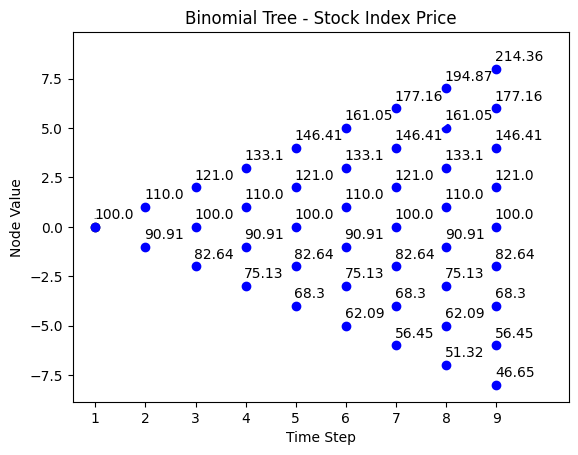

In [45]:
# Binomial tree path for stock price - Panel A
# binomial_model_stock(N, S0, u,r):
N = 8
S0 = 100
u = 1.1
d = 1/u
r = 0.04

title = 'Binomial Tree - Stock Index Price'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r), dx=-0.025, dy=0.4, cex=1, digits=2, title = title)


To replicate the cost of the replicating portfolio, we define a cost function to reproduce the cost of the replication portfolio.

In [64]:
# Binomial tree cost
def binomial_model_cost(N,S0,u,d,r,FT):
    # d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p

    # initiation of cost tree
    cost = np.zeros([N + 1, N + 1])

    # fill the binomial tree cost tree with backward deduction
    # i: column
    # j: row
    for i in range(N, -1, -1):
        for j in range(i, -1, -1):
            if i == N:
                cost[j, i] = np.maximum(FT,S0 * (u ** (i - j)) * (d ** j))
            else:
                cost[j, i] = (p * cost[j, i + 1] + q * cost[j + 1, i + 1]) / (1 + r)


    return cost

We now use the cost function to simulate the binomial tree path for the cost value of the replicating portfolio in Panel (B) in section 5.4.1.

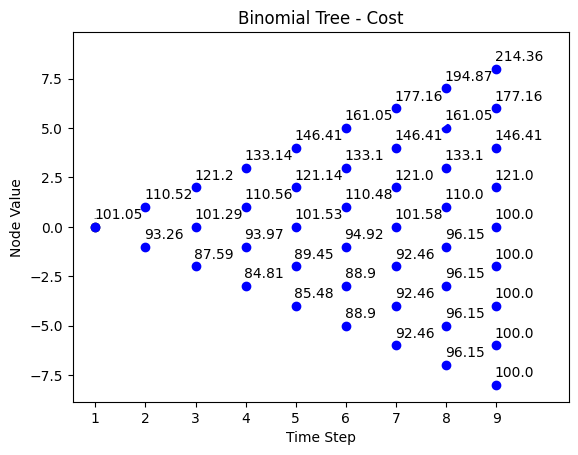

In [47]:
# draw the binomial tree cost

N = 8
S0 = 100
u = 1.1
d = 1/u
r = 0.04
FT = 100

title = 'Binomial Tree - Cost'
binomial_tree_plot(binomial_model_cost(N,S0,u,d,r,FT), dx=-0.025, dy=0.4, cex=1, digits=2,title=title)

To calculate the delta and investments in T-Bills, we define another function to achieve this.
Delta and investments in T-Bills are calculated from the stock index path and the portfolio replication cost path.

In [48]:
# calculate the delta: proportion invested in stock index

# Binomial tree cost delta and tb investment
def binomial_model_cost_delta_tb(N,S0,u,d,r,FT):
    # d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p

    # Initiate the binomial tree
    stock = np.zeros([N + 1, N + 1])
    cost = np.zeros([N + 1, N + 1])

    delta = np.zeros([N, N])
    tb = np.zeros([N, N])

    # calculate stock tree
    stock = binomial_model_stock(N,S0,u,d,r)
    cost = binomial_model_cost(N,S0,u,d,r,FT)

    # calculate the binomial tree delta tree with from binomial tree cost and binomial tree stock
    # i: column
    # j: row
    for i in range(N):
        for j in range(i+1):
            delta[j, i] = (cost[j, i+1] - cost[j + 1, i+1]) / (stock[j,i] * (u - d))


    # calculate the binomial tree tb investment from binomial tree cost and binomial tree stock
    # i: column
    # j: row
    for i in range(N):
        for j in range(i+1):
            tb[j, i] = (u*cost[j+1, i+1] - d*cost[j, i+1]) / ((u - d)*(1+r))

    return delta, tb

Now we simulate the delta and invesments in T-Bills in synthetic insurance strategy described in Panel (C) and Panel (D) in section 5.4.1.

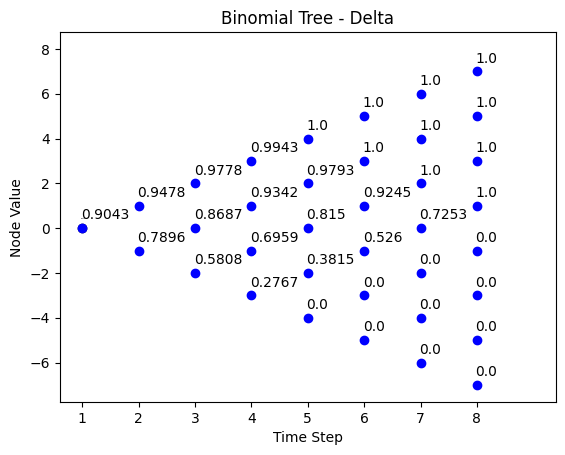

In [49]:
# draw the binomial tree cost
delta,tb= binomial_model_cost_delta_tb(N,S0,u,d,r,FT)

N = 8
S0 = 100
u = 1.1
d = 1/u
r = 0.04
FT = 100

title = 'Binomial Tree - Delta'
binomial_tree_plot(delta, dx=-0.025, dy=0.4, cex=1, digits=4,title = title)

Next we simulate the binomial tree path for the investment in T-Bills to reproduce results in Panel (D) in synthetic insurance strategy desribed in section 5.4.1.

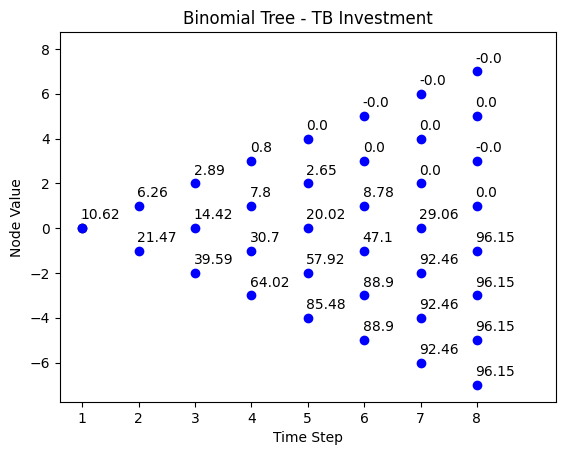

In [50]:
# draw the binomial tree tb

title = 'Binomial Tree - TB Investment'
binomial_tree_plot(tb, dx=-0.025, dy=0.4, cex=1, digits=2,title=title)

### **5.4.2 Theoretically Construct the Optimal Replicating Portfolio for Synthetic Portfolio Insurance Strategy**

Now we theoretically calculate the construction of replicating portfolio for synthetic portfolio insurance strategy. Specifically, we show how to calculate the investment in stock index $\Delta_{t}$ and the investment in T-Bills from the stock index price tree. The steps at a high level are illustrated as:

1. Simulate the stock path of stock index (e.g. Panel A)
2. Simulate the cost of replicated portfolio (e.g. Panel B)
3. Use backward deduction to calculate the investment in stock index  $Delta_{t}$ and investment in T-Bills (e.g. Panel C and D).

We explain this with a one-period stock price movement.

The one-period stock price movement is shown below at time $t$:

| Date $t$ index | Date $t+1$ |
| ---------------|------------ |
|                |$S_{t+1} = u*S_{t}$ |
| $S_{t}$        |                    |
|                |$S_{t+1} = d*S_{t}$ |


The one-period replication cost is shown below at time $t$:

|Date $t$ replication portfolio | Date $t+1$ |
|---------------|------------|
|               |$C_{u,t+1}$|
|$C_{t}$        |
|               |$C_{d,t+1}$|

We follow the steps below to calculate the shares of stock index and investments of T-Bills required for the synthetic portfolio insurance strategy.

**Step 1**:

We simulate the stock index price $S_{t}$ at date $t$.

**Step 2**:

We calculate the replicating portfolio value we need at up date $𝐶_{𝑢,𝑡+1}$ and down state $𝐶_{𝑑,𝑡+1}$. These costs are a maximum of the stock index holdings and the floor value we reuire for our investment strateg, i.e.
$$C_{u,t+1} = \text{max} (S_{t+1}(u) * \text{shares invested}, F_{t+1})$$
$$C_{d,t+1} = \text{max} (S_{t+1}(d) * \text{shares invested}, F_{t+1})$$

**Step 3**:

We calculate $\Delta_{t}$ shares of the stock index and $𝐵_{𝑡}$ dollars of T-Bills (at rate $𝑟_{𝑓}$ with $𝑅_{𝑓}= 1+𝑟_{𝑓}$)at date $t$.

We know that at date $t+1$:

* if the stock index price goes up: $𝐶_{𝑢,𝑡+1}=\Delta_{𝑡}∗(𝑢∗𝑆_{𝑡})+𝑅_{𝑓}∗𝐵_{𝑡}$
* if the stock index price goes down: $𝐶_{𝑑,𝑡+1}=\Delta_{𝑡}∗(𝑑∗𝑆_{𝑡})+𝑅_{𝑓}∗𝐵_{𝑡}$

Knowing $𝐶_{𝑢,𝑡+1}$ and $𝐶_{𝑑,𝑡+1}$ from **Step 2**, we solve these two equations for $\Delta_{𝑡}$ and $𝐵_{𝑡}$:

$$\Delta_{t} = \frac{C_{u,t+1} - C_{d,t+1}}{(u-d)*S_{t}}$$
$$B_{t} = \frac{u*C_{d,t+1} - d*C_{u,t+1}}{(u-d)*R_{f}}$$

**Step 4**:

With $\Delta_{t}$ and $B_{t}$ in **Step 3**, we solve for the cost of this position at date $t$:
$$𝐶_{𝑡}=\Delta_{𝑡}∗𝑆_{𝑡}+𝐵_{𝑡}$$

 or, we can solve $C_{t}$ directly from $C_{u,t+1}$ and $C_{d,t+1}$.

$$C_{t} = \frac{1}{R_{f}}*[p*C_{u,t+1} + (1-p)*C_{d,t+1}],$$

where $p$ is the <u>risk neutral probability</u>:

$$p = \frac{R_{f}-d}{u-d}$$


### **5.4.3 Another Simple Example of Synthetic Insurance Strategy**

We have theoretically illustrated the steps to replicate the porfolio under synthetic insurance strategy. Now we use a simple example to illustrate the optimal peplicating portfolio constructing procedure.

We work backwards to construct the optimal strategy: we start by setting what we want at the end, and then work backwards to see what we need at earlier dates to achieve the ending value of our portfolio.

Consider the following example:

* $T=2, F_{2} = 100, R_{f} = 1.05$
* $u = 1.1$, $d = 0.9091$

**Step 1**

At date $T$:

We simulate the path for the stock index value $S_{T}$.

The stock index binomial tree:

|t =  0  | t = 1   | t = 2  |
|--------| --------| -------|
|        |         |121     |
|        |110      |        |
|100     |         |100     |
|        |90.91    |        |
|        |         |82.65   |

We define the desired payoffs to the portfolio, $𝐶_{𝑇}$, as a function of the ending stock index value, $𝑆_{𝑇}$. Put $𝐶_{𝑇}$ in a blank binomial tree at date $t=T$, for each possible value of $𝑆_{𝑇}$.

At date $T =2$: $C_{2}$ = max{$S_{2},F_{2}$}.

The replicating portfolio cost tree is:

|t =  0  | t = 1   | t = 2  |
|--------| --------| -------|
|        |         |121     |
|        |    -    |        |
|   -    |         |100     |
|        |    -    |        |
|        |         |100     |




**Step 2**

At date $T-1$, at each node: we define $𝐶_{𝑢,𝑇}$ as the payoff if the index goes up from the node at $T-1$ to node at $T$; we define $𝐶_{𝑑,𝑇}$ as the payoff if the index goes down from the node at date $T-1$ to the node at date T. We solve the above equations for $\Delta_{𝑇−1}$, $𝐵_{𝑇−1}$, and $𝐶_{𝑇−1}$. Put $𝐶_{𝑇−1}$ in the partially-completed binomial tree at date $T-1$.

At $t=1$ $S_{1} = 110$:
* $C_{u,2} = 121$, $C_{d,2} = 100$, so $\Delta_{1} = 1$, $B_{1} = 0$, and $C_{1} = 110$.

At $t=1$ $S_{1} = 90.91$:
* $C_{u,2} = 100$, $C_{d,2} = 100$, so $\Delta_{1} = 0$, $B_{1} = 95.24$, and $C_{1} = 95.24$.

**Step 3**

At date $T-2$, we repeat the proedure in **Step 2**.

At $t=0$ $S_{0} = 100$:

* $C_{u,1} = 110$, $C_{d,1} = 95.24$, so $\Delta_{0} = 0.7732$, $B_{0} = 23.76$, and $C_{0} = 101.08$.
  

Thus, the cost of this portfolio insurance strategy is $101.08$.

### **5.4.4 Another Example when Initial Investment and Stock Price are not equal**

Up to now, our examples in synthetic portfolio investment strategy all assume that $V_{0} = S_{0}$.

This is not a required assmuption in real practice. Now we use another example to explain the synthetic option strategy when this condition is not met.

Suppose:

* The stock index $S_{0}=100$
* $u=1.2$, $d=0.8$ and $1+r_{f}=1.04$
* the beginning investable wealth: $V_{0}=260$.
  For a full investment in the index, we buy $N_{0}=\frac{V_{0}}{S_{0}}=2.60$ shares of the index.

Next we would like to understand the following questions:

(a) Draw the stock index tree for the one share for $t=0,1,2, \text{and } 3$. What is the risk-neutral probability $p$?

(b) Define your “unconstrained wealth” as the value of your fully-stock-invested portfolio. If you put all your wealth in the stock index, draw your wealth tree.

(c) You are implementing a Stop-Loss ($S_{L}$) strategy with $F_{3}=200$. Insert under the tree in part (b) the $PV_{t}(F_{3})$ calculation going back to $t=0$. Now, show two trees: (i) the value of your wealth, $V_{t}$, if you follow the optimal $S_{L}$ strategy and (ii) the optimal number of shares of the index you own, $N_{t}$, at each node at $t=0,1,\text{and} \space 2$.

(d) Suppose you now follow the synthetic portfolio insurance strategy with $F_{3}=200$. Show the optimal cost tree, $C_{t}, t=0,1,2,3$.

(e) Show, for the $PI$ strategy, how many shares of the index you own, $N_{t}$, at each node at each date, $t=0,1, \text{and } 2$. In another tree, divide this by $N_{0}=2.6$ to get the “hedge ratio” of your portfolio.

(f) Get the optimal amount of T-Bills to buy, $B_{t}$, under the $PI$ strategy, at each node at each date $t=0,1,\text{and } 2$.

(g) Compare the number of shares held at each date, $N_{t}$, under the $S_{L}$ scheme, in part (c), with the optimal $N_{t}$ in the $PI$ scheme, in part (e). Explain the difference.

Now we answer the above questions.

**Part (a)**

$S_{0} = 100$, $V_{0} = 260$, $N_{0} = \frac{V_{0}}{S_{0}} = 2.6$, $F = 200$.

$u = 1.2$, $d = 0.8$, $R_{f} = 1+ r_{f} = 1.04$

Risk neutral probability $p$ is: $p = \frac{ R_{f} - d}{u-d} = \frac{1.04-0.8}{1.2-0.8} = 0.6$

The binomial tree for the stock index price is:

|t = 0   | t = 1  | t  = 2 | t = 3 |
|--------|--------|--------|------ |
|        |        |        |172.8  |
|        |        |144     |       |
|        |120     |        |115.2  |
|100     |        |96      |       |
|        |80      |        |76.8   |
|        |        |64      |       |
|        |        |        |51.2   |






We reproduce the results in part (a) in the following code.

Risk neurtral probability is calculated here:

In [66]:
# Python code to reproduce part (a)
S0 = 100
u = 1.2
d = 0.8
r = 0.04

# up and down risk neutral probabilities
def risk_neutral_prob(u,r):
  # d = 1/u
  p = (1+r-d)/(u-d)
  return p
# print("K0 is:", np.round(K0(sigma_b,sigma_s,corr),3))
print("The risk neurtal probabilities is:", np.round(risk_neutral_prob(u,r),3))

The risk neurtal probabilities is: 0.6


The binomial tree path for the stock index price is simulated below.

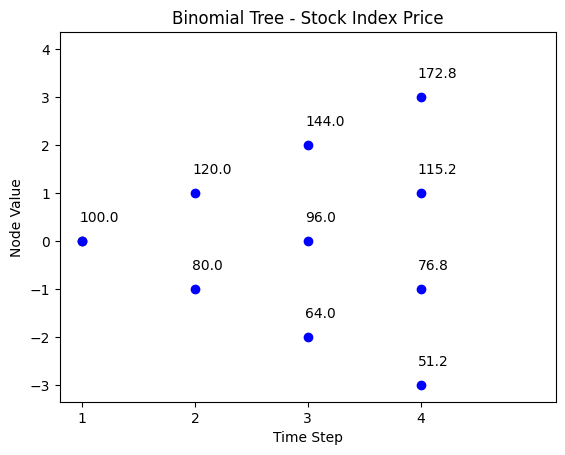

In [67]:
# stock index binomial tree

N = 3
S0 = 100
u = 1.2
d = 0.8
r = 0.04

title = 'Binomial Tree - Stock Index Price'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r), dx=-0.025, dy=0.4, cex=1, digits=2,title = title)

**Part (b)**

With unconstrained wealth, the asset value path is shown below:

|t = 0   | t = 1  | t  = 2 | t = 3 |
|--------|--------|--------|------ |
|        |        |        |449.28 |
|        |        |374.4   |       |
|        |312     |        |299.52 |
|260     |        |249.6   |       |
|        |208     |        |199.68 |
|        |        |166.4   |       |
|        |        |        |133.12 |





Now we simulate the asset value path with code.

Note that our function for binomial tree model assumes $V_{0} = S_{0}$. Thus, we need multiply the ratio $\frac{V_{0}}{S_{0}}$ when we simulate the asset value path.

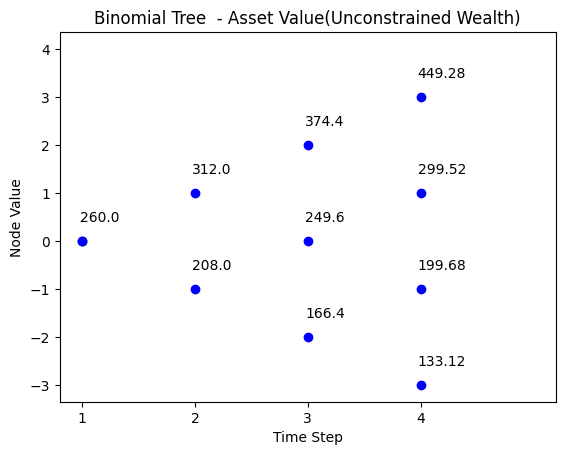

In [68]:
# the binomial tree path with unconstrained wealth

N = 3
S0 = 100
u = 1.2
d = 0.8
r = 0.04
V0 = 260

N = 3
S0 = 100
u = 1.2
r = 0.04

wealth_stock_ratio = V0/S0

title = 'Binomial Tree  - Asset Value(Unconstrained Wealth)'

binomial_tree_plot(binomial_model_stock(N, S0, u,d,r)*wealth_stock_ratio, dx=-0.025, dy=0.4, cex=1, digits=2,title = title)

**Part (c)**

Under stop-loss strategy, the asset value path is shown below, where the stop loss floor is $200$.

We see that the terminal value $173.06$ after switching to T-Bills is smaller than the floor $200$ because there are jumps in stock index price. Specifically, the node value at $t=2$ when we switch to T-Bills is $166.4$, which is less than $184.91$, the floor value discounted to $t=2$..

|t = 0    | t = 1   | t = 2 | t = 3 |
|---------|---------|-------|------ |
|        |        |        |449.28  |
|        |        |374.4   |        |
|        |312     |        |299.52  |
|260     |        |249.6   |        |
|        |208     |        |199.68  |
|        |        |166.4   |**173.06**|
|        |        |        |**173.06** |
|$$PV_{t}(F_{t})$$|184.91|192.31|200   |





We simulate the asset value path under stop loss strategy with the code below.

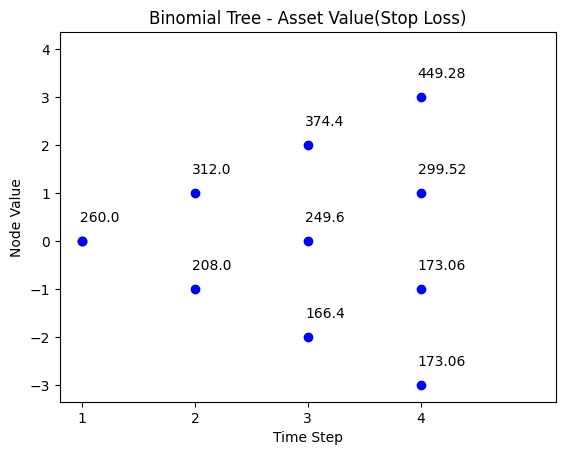

In [71]:
# Python code to reproduce part (c) - binomial tree wealth path under stop loss strategy

N = 3
S0 = 100
u = 1.2
d = 0.8
r = 0.04
V0 = 260
wealth_stock_ratio = V0/S0
FT = 200/wealth_stock_ratio

title = 'Binomial Tree - Asset Value(Stop Loss)'

binomial_tree_plot(binomial_model_stock_SL(N, S0, u,d,r,FT)*wealth_stock_ratio, dx=-0.025, dy=0.4, cex=1, digits=2,title = title)


**Part (d)**

This part reports the asset value under synthetic portfolio insurance strategy. The binomial path of the asset value is:


|t = 0    | t = 1   | t = 2 | t = 3 |
|---------|---------|-------|------ |
|        |        |        |449.28  |
|        |        |374.4   |        |
|        |312.05  |        |299.52  |
|263.89  |        |249.72  |        |
|        |218.04  |        |200     |
|        |        |192.31  |        |
|        |        |        |200     |



We simulate the path under synthetic information strategy with the code below.

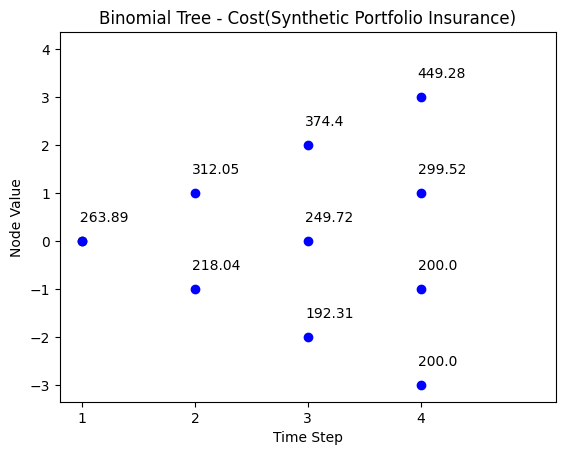

In [72]:
# python code for part (d) - portfolio insurance

# Binomial tree cost
N = 3
S0 = 100
u = 1.2
d = 0.8
r = 0.04
V0 = 260
wealth_stock_ratio = V0/S0
FT = 200/wealth_stock_ratio

title = 'Binomial Tree - Cost(Synthetic Portfolio Insurance)'

binomial_tree_plot(binomial_model_cost(N,S0,u,d,r,FT)*wealth_stock_ratio, dx=-0.025, dy=0.4, cex=1, digits=2, title = title)

**Part (e)**

This part simulates the path of the number of shares invested in stock index $P.I.N_{t}$, and hedge ratio $Delta_{t}$ of the portfolio.

$P.I.N_{t}$:

| t = 0   | t = 1 | t = 2 |
|---------|-------|------ |
|        |        |2.6    |
|        |2.5974   |      |
|2.3503  |        |2.5917 |
|        |1.7942  |       |
|        |        |0      |

Hedge ratio:

|t = 0   | t = 1 | t = 2  |
|---------|-------|------ |
|        |        |1      |
|        |0.999   |       |
|0.904   |        |0.9968 |
|        |0.6901  |       |
|        |        |0      |  



We firstly simulate hedge ratio $Delta_{t}$. Note that $Delta_{t}$ is not affected by $\frac{V_{0}}{S_{0}}$.

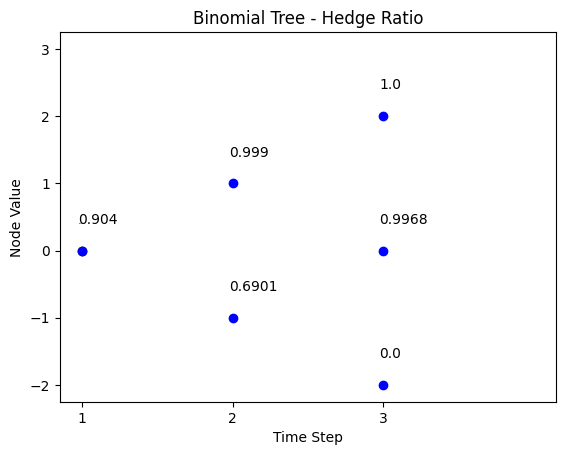

In [75]:
# python code for part (e) - P.I.N and hedge ratio

# hedge ratio (delta)
N = 3
S0 = 100
u = 1.2
d=0.8
r = 0.04
V0 = 260
wealth_stock_ratio = V0/S0
FT = 200/wealth_stock_ratio

title = 'Binomial Tree - Hedge Ratio'

delta,tb= binomial_model_cost_delta_tb(N,S0,u,d,r,FT)
binomial_tree_plot(delta, dx=-0.025, dy=0.4, cex=1, digits=4,title = title)

We then simulate the number of shares invested in stock index $P.I.N.$.

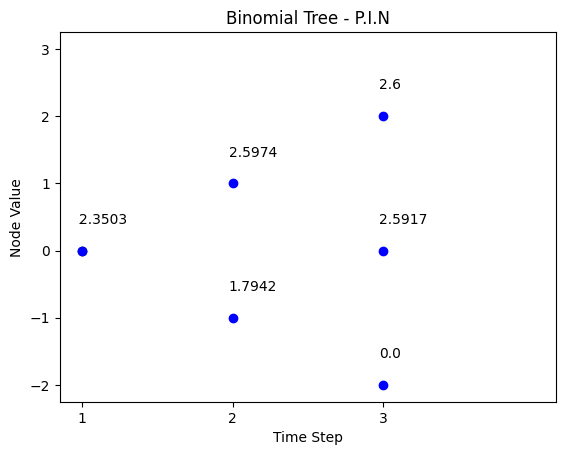

In [76]:
# python code for part (e) - P.I.N and hedge ratio

# P.I.N = delta * V0/S0

title = 'Binomial Tree - P.I.N'

binomial_tree_plot(delta*wealth_stock_ratio, dx=-0.025, dy=0.4, cex=1, digits=4,title = title)

**Part (f)**

We look at the investments in T-Bills: $P.I.B$

| t = 0   | t = 1 | t = 2 |
|---------|-------|------ |
|        |        |0      |
|        |0.36    |       |
|28.86   |        |0.92   |
|        |74.5    |       |
|        |        |192.31 |



We simulate the path for T-Bills investments.

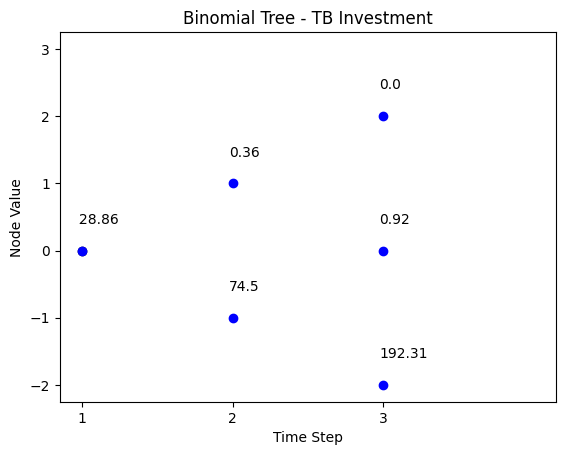

In [77]:
# python code for part (f) - P.I.B
# P.I.B = tb * V0/S0

# Binomial tree tb investment
N = 3
S0 = 100
u = 1.2
d=0.8
r = 0.04
V0 = 260
wealth_stock_ratio = V0/S0
FT = 200/wealth_stock_ratio

title = 'Binomial Tree - TB Investment'

delta,tb= binomial_model_cost_delta_tb(N,S0,u,d,r,FT)
binomial_tree_plot(tb*wealth_stock_ratio, dx=-0.025, dy=0.4, cex=1, digits=2,title = title)

**Part (g)**

Stop loss stays at $N_{1} = 2.6$ when $S_{1} = 80$, while the $P.I$ drops to $N_{1} = 1.7942$. The stop loss is too inflexible. This causes it to drop below the floor at $T = 3$.

## **5.5 Constant Proportion Portfolio Insurance (CPPI)**

This is a (dynamic, convex) strategy.

CPPI differs from the other four strategies in its **objective**.

The other four strategies only provide the portfolio insurance on the final date of the insurance period. There is no guarantee, in the first four methods, that portfolio value before the maturity date of the insurance won't be below the floor. The objective of the first four strategies is to be at or above the floor *only on the final dat*e. Alternatively, the objective of CPPI is to be above the floor all the time, from inception to maturity.

Define $𝐷_{𝑠t}$ as the investment in stock at date $t$. CPPI determines $𝐷_{𝑠}$ from

$$𝐷_{𝑠} =𝑚*(𝑉_{𝑡}−𝐹)$$

where $𝑉_{𝑡}$ is the value of the portfolio on date $t$, $𝐹$ is the floor (which applies at ALL dates) and 𝑚 is the multiplier (to allow more or less upside potential).
We must start with $𝑉_{0}>𝐹$ and CPPI keeps $𝑉_{𝑡}>𝐹$ for all $t$ (in the absence of jumps in the stock index). Every day we rebalance the portfolio to give an equity weighting of:
$$𝑋_{𝑠t} =\frac{𝐷_{𝑠t}}{𝑉_{𝑡}}=𝑚∗(1−\frac{𝐹}{𝑉_{𝑡}})$$

**The CPPI Strategy is Path-Dependent**



Assume a binomial stock index tree with $R_{f} = 1.05$, $ u = 1.1$ and $d = 0.9091$.

| t = 0   | t = 1 | t = 2 |
|---------|-------|------ |
|         |        |121   |
|        |110     |       |
|$S_{0} = 100$   |        |100 |
|        |90.91    |       |
|        |        |82.65   |

Suppose the CPPI rule uses $𝑚=2,𝐹=80,𝑉_{0}=100$ and as usual, $𝐷_{𝑠t} =𝑚∗(𝑉_{𝑡}−𝐹)$.

At $t=0$ with $𝑆_{0}=100$:

* $𝐷_{𝑠0}=2∗(100−80)=40$. So, $𝐷_{𝑐0}=100−40=60$.

At $t=1$ with $𝑆_{1}=110$:

* The portfolio value is $𝑉_{1}=60∗(1.05)+40∗(1.1)=107$.

* And we rebalance to: $𝐷_{𝑠1}=2∗(107−80)=54$ and $𝐷_{𝑐1}=107−54=53$.

At $t=1$ with $𝑆_{1}=90.91$:

* The portfolio value is $𝑉_{1}=60∗(1.05)+40∗(0.9091)=99.36$.

* And we rebalance to: $𝐷_{𝑠1}=2∗(99.36−80)=38.73$ and $𝐷_{𝑐1}=99.36−38.73=60.63$.

Given these different portfolios at $t=1$, suppose we end up at $t=2$ with $𝑆_{2}=100$, which could happen following either $𝑆_{1}=110$ or $𝑆_{1}=90.91$. So, we could end up at $𝑆_{2}=100$ from two points:

* If $𝑆_{1}=110$ and then $𝑆_{2}=100$: then $𝑉_{2}=53∗(1.05)+54∗(0.9091)=104.74$.

* If $𝑆_{1}=90.91$ and then $𝑆_{2}=100$: then $𝑉_{2}=60.63∗(1.05)+38.73∗(0.9091)=106.26$.

So, if we were standing at date $t=0$, and we were told $𝑆_{2}=100$ will happen, we STILL could not predict what our $t=2$ portfolio value will be; it depends on HOW the stock index gets to $𝑆_{2}=100$. We will have $𝑉_{2}=104.74$ OR $𝑉_{2}=106.26$.

The CPPI strategy is path-dependent.


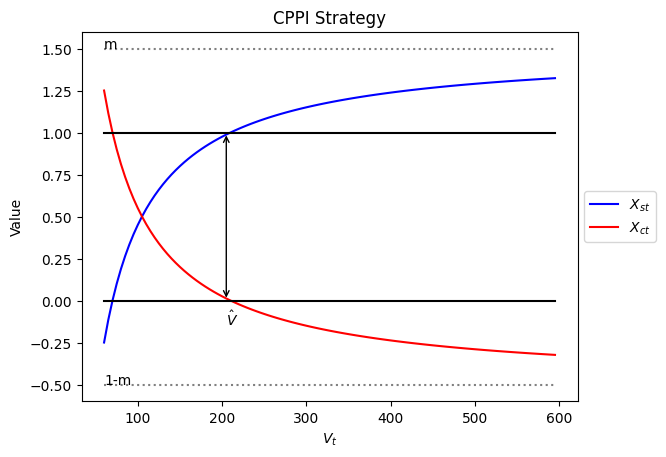

In [78]:
###Constant proportion portfolio insurance (CPPI)

m = 1.5
F = 70
V_Ts = np.arange(60,600,5)
# [70,80,100,120,140,160,180,200]
up_bounds = [1 for _ in range(len(V_Ts))]
low_bounds = [0 for _ in range(len(V_Ts))]
m_bounds = [m for _ in range(len(V_Ts))]
one_minus_m_bounds = [1-m for _ in range(len(V_Ts))]


def cppi_delta(Vt,F,m):
    return m*(1-F/Vt)

def cppi_Dc(Vt,F,m):
    return 1-cppi_delta(Vt,F,m)

Dsts=[cppi_delta(V_T,F,m) for V_T in V_Ts]
Dcts=[cppi_Dc(V_T,F,m) for V_T in V_Ts]

# draw a graph for the Dsts and Dcts
fig, ax = plt.subplots()

ax.plot(V_Ts, Dsts, label=r'$X_{st}$',color = 'blue')
ax.plot(V_Ts, Dcts, label=r'$X_{ct}$',color = 'red')
ax.plot(V_Ts,up_bounds, label='Upper Bound', color = 'black')
ax.plot(V_Ts,low_bounds, label='Lower Bound', color = 'black')
ax.plot(V_Ts,m_bounds, label='m', linestyle='dotted',color = 'grey')
ax.plot(V_Ts,one_minus_m_bounds, label='1-m', linestyle='dotted',color = 'grey')

ax.set_xlabel('$V_{t} $')
ax.set_ylabel('Value')
ax.set_title('CPPI Strategy')

# ax.text(500,0.5,r'$V_{t} - F$')

# Add an arrow annotation
arrow_start = (205, 1)  # Starting point of the arrow
arrow_end = (205, 0)    # Ending point of the arrow
arrow_properties = dict(arrowstyle='<->', color='black')  # Arrow style and color

ax.annotate('',xy=arrow_start,xytext=arrow_end, arrowprops=arrow_properties)
ax.text(205,-0.15,r'$\hat{V}$')
ax.text(V_Ts[0],m,'m')
ax.text(V_Ts[0],1-m,'1-m')
ax.legend([r'$X_{st}$',r'$X_{ct}$'],loc='center left', bbox_to_anchor=(1, 0.5))

## **5.6 IAA Strategy Comparisons  -Some examples**

We conclude this section of the course with a review of an important difference between different strategies, whether they are SAA, TAA, or IAA strategies. This key difference is how $V_{t}$ reacts to changes in $S_{t}$ over some $t$ in $[0,T]$.

To demonstrate, we show how $V_{t}$ varies with $S_{t}$ for a particular path of $S_{t}$. We assume $r_{f}=0$ for simplicity.



**1.  The Stop-Loss Strategy with $V_{0} = 100$ and $F=80$**

This strategy starts with full investments in stocks and only switches from stocks to T-Bills when the portfolio value reaches the floor, i.e. $F=80$ for all periods because we assume $r_{f} = 0$.
After switch, the stock price does not affect our portflio value because we convert all the stocks to T-Bills.

|t   |   $S_{t}$  | $N_{st}$| $D_{st}$ | $D_{ct}$  | $V_{t}$ |
|----|------------|---------|----------|-----------|-------- |
|0   |100         |1        |100      |0          |100      |
|1   |90          |1        | 90      |0          |90       |
|2   |80          |1        |  80      |0          |80       |
|    |switch      |0        |   0      |80         |80       |
|3   |90          |0        |   0      |80         |80       |
|4   |100         |0        |   0      |80         |80       |

This strategy is piecewise linear: it either goes up and down with the market or it does not react at all to the market (once it hits $PV_{t}(F_{T})$).

We define a function to simulate the paths to view the movement of investments in stock and T-Bills.

**2.   Constant Proportion Portfolio Insurance with $V_{0}=100$, $m=2$ and $F=70$**

t   |   $S_{t}$  | $D_{st}$ | $D_{ct}$ | $N_{st}$  | $V_{t} = D_{st}+D_{ct}$| Desired $D_{st} = 2\times (V_{t}-70)$|
----|------------|----------|----------|-----------|--------|--------
0   |100         |60        |40        |0.60       |100 | 60
1   |90          |54 = 0.6 $\times$ 90        |40        |0.6        |94 | 48 =2 $\times$ (94-70) < 54  $\implies$ Sell
Rebalance (sell) |          |48      |46 =94-48 | 0.533 = 48/90 | 94 | 48
2   |80          |42.67=0.533 $\times$ 80               |46  |0.533       |88.67 | 37.34 = 2 $\times$ (88.67-70)< 42.67  $\implies$ Sell
Rebalance (sell) |          |37.34     |51.33 = 88.67-37.34  | 0.4668=37.34/80     |88.67 | 37.34
 3   |90          |42.01 = 0.4668 $\times$ 90        |51.33        |0.4668      |93.34 | 46.68= 2  $\times$ (93.34-70) > 42.01  $\implies$ Buy
Rebalance (buy)  |          |46.68     |46.66=93.34-46.68    |    0.5187=46.68/90 |93.34 | 46.68
4   |100         |51.87 = 0.5187 $\times$ 100     |46.66     |0.5187      |98.53 | 57.06 = 2 $\times$ (98.53-70)  > 521.87  $\implies$ Buy


This strategy is **convex**: the slope steepens as $S_{t}$ and $V_{t}$ increase. It “buys high and sells low”, buying after the stock index rises and selling after the stock index falls. A momentum TAA investor would have the same convex behaviour.


We define a function to simulate the paths of investments in stock and T-Bills under CPPI strategy.

**3.   The Constant-Mix SAA Strategy with $V_{0}=100$ and $w_{s}^{*}=0.60$ (Rebalancing to 60/40)**

t   |   $S_{t}$  | $D_{st}$ | $D_{ct}$  | $V_{t}$ | $N_{st} = D_{st}/S_t$ | Actual $w_s=D_{st}/V_t$
----|------------|----------|-----------|--------|--------|--------
0   |100         |60        |40         |100|0.6 |0.6
1   |90          |54 = 0.6 $\times $ 90       |40         |94|0.6 |0.5745 $\implies$ Buy
Rebalance (buy)  |        |56.4 = 0.6 $\times$ 94    |37.6 = 0.4 $\times$ 94      |94|  0.6267 |0.6
2   |80      |50.13 = 0.6267 $\times$ 80         |37.6       |87.73|0.6267|0.5714  $\implies$ Buy
Rebalance (buy)|       |52.64 = 0.6 $\times$ 87.73     |35.09 =  0.4 $\times$ 87.73     |87.73|0.6580|0.6
3   |90          |59.22 = 0.6580 $\times$ 90       |35.09      |94.31|0.6580|0.6279  $\implies$ Sell
Rebalance (sell)|        |56.59 = 0.6 $\times$  94.31    |37.72 = 0.4 $\times$ 94.31     |94.31|0.6288|0.6
4   |100         |62.88 = 0.6288 $\times$ 100     |37.72       |100.60|0.6288|62.61  $\implies$ Sell


This strategy is **concave**: the slope flattens as $S_{t}$ grows. This comes because the strategy “buys low and sells high”, buying after $S_{t}$ falls and selling after $S_{t}$ rises. A contrarian TAA investor would have the same behaviour.

A static Buy & Hold strategy has a linear payoff. A concave strategy will in general have a higher $V_{t}$ than the static Buy & Hold, if the index mean reverts, i.e. bounces back and forth, and the convex strategy will, in the same circumstances, have a lower  $V_{t}$ (that is the “cost” of downside protection).

**Summary of SAA, TAA and IAA Strategies**


| Payoff Shape | Passive              | Forecast Driven                                    | Wealth Driven |
|--------------|----------------------|----------------------------------------------------|---------------|
| Linear       | SAA "Buy & Hold"     |                                                    |               |
| Concave      | SAA “Constant Mix”   | Contrarian/Value TAA (buy low, sell high)          |               |
| Convex       |                      | Momentum TAA (buy high, sell low)                  | All IAA strategies |



“Passive” means no reaction to changing expectations or risk tolerance (SAA). “Forecast Driven” means reacting to changing expectations (TAA). “Wealth Driven” means reacting to changes in risk tolerance because wealth changes (IAA).

“Concave” results from buying after the index drops and selling after the index rises. “Convex” results from buying after the index rises and selling after the index falls.

We see that concave strategies can result from two quite different philosophies:
* An SAA “constant mix” strategy, where the decision-maker feels they cannot forecast markets
* A Contrarian (Value) TAA strategy, where the decision-maker feels they can forecast and that the stock market mean-reverts.

Similarly, convex strategies can result from any IAA strategy, again where no forecasting is involved, or from a Momentum TAA strategy.

We plot the SAA and IAA strategies to further understand their payoff structure.

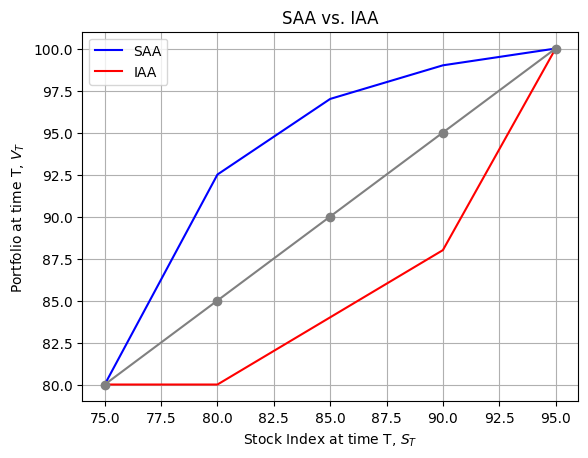

In [35]:
###  Strategy payoof examples
from scipy.interpolate import make_interp_spline, BSpline

S_Ts = np.arange(75,100,5)
V_Ts = np.arange(75,105,5)

# concave payoff function
SAA = [80,92.5,97,99,100]

# convex payoff function
IAA = [80,80,84,88,100]

# linear payoff functin 
Linear = [80,85,90,95,100]

# draw the graph for strategy payoff examples

# plot smooth line


fig, ax = plt.subplots()
SAA_spl = make_interp_spline(S_Ts,SAA,k=3)
SAA_smooth = SAA_spl(S_Ts)

IAA_spl = make_interp_spline(S_Ts,IAA,k=3)
IAA_smooth = IAA_spl(S_Ts)

ax.plot(S_Ts, SAA_smooth, label='SAA', color = 'blue')
ax.plot(S_Ts, IAA_smooth, label='IAA', color = 'red')
ax.plot(S_Ts, Linear, label='Linear', color = 'grey',marker='o')
# ax.plot(S_Ts, SAA, label='SAA', color = 'blue')
# ax.plot(S_Ts, IAA, label='IAA', color = 'red')
# ax.plot(S_Ts, Linear, label='Linear', color = 'green')
ax.set_xlabel(r'Stock Index at time T, $S_{T}$')
ax.set_ylabel(r'Portfolio at time T, $V_{T}$')
ax.set_title('SAA vs. IAA')
ax.legend(['SAA','IAA'])
ax.grid()
plt.show()


